In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_grid_dataframe(ranges, resolutions):
    """
    Generate a pandas DataFrame containing a grid of points.

    Args:
        ranges (list of tuples): Each tuple specifies the (min, max) range for one dimension.
        resolutions (list of ints): Number of points to sample along each dimension.

    Returns:
        pd.DataFrame: Grid points, one row per point, one column per dimension.
    """
    assert len(ranges) == len(resolutions), "Length of ranges and resolutions must match"

    axes = [np.linspace(start, stop, num) for (start, stop), num in zip(ranges, resolutions)]
    grid = np.array(np.meshgrid(*axes)).T.reshape(-1, len(ranges))
    columns = [f"x{i}" for i in range(len(ranges))]
    return pd.DataFrame(grid, columns=columns)

def plot_grid_dataframe(df):
    """
    Plot a grid DataFrame in 2D or 3D depending on dimensionality.

    Args:
        df (pd.DataFrame): Grid DataFrame with columns named x0, x1, ..., xn.
    """
    dim = df.shape[1]
    if dim == 2:
        plt.figure(figsize=(6, 6))
        plt.scatter(df["x0"], df["x1"], s=10)
        plt.xlabel("x0")
        plt.ylabel("x1")
        plt.title("2D Grid")
        plt.grid(True)
        plt.axis('equal')
        plt.show()

    elif dim == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df["x0"], df["x1"], df["x2"], s=10)
        ax.set_xlabel("x0")
        ax.set_ylabel("x1")
        ax.set_zlabel("x2")
        ax.set_title("3D Grid")
        plt.show()

    else:
        print(f"Plotting not supported for {dim}D. Only 2D and 3D are supported.")




Bad key text.markup in file /Users/tako/.matplotlib/matplotlibrc, line 165 ("text.markup         : 'plain'  # Affects how text, such as titles and labels, are")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:
df_8d = generate_grid_dataframe(ranges=[(0, 1), (0, 1), (-30, 30), (0, 10), (0, 1), (0, 1), (-30, 30), (0, 10)], resolutions=[5, 5, 10, 10, 2, 5, 7, 8])
# df_8d.to_csv("/Users/tako/work/git/account_takotime808/multioutreg/docs/_static/example_datasets/grid_8N.csv", index=False)


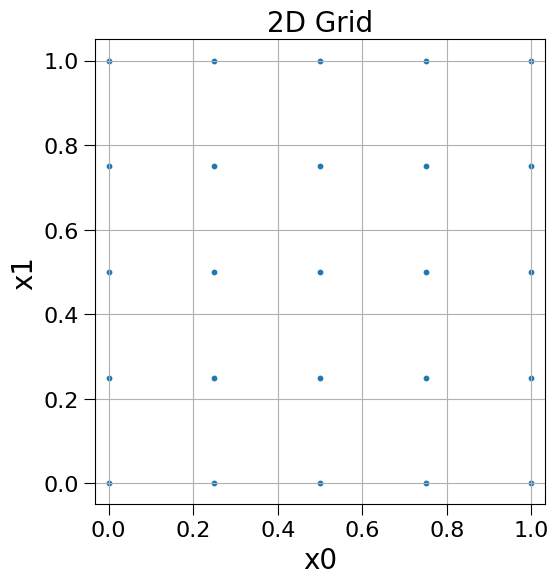

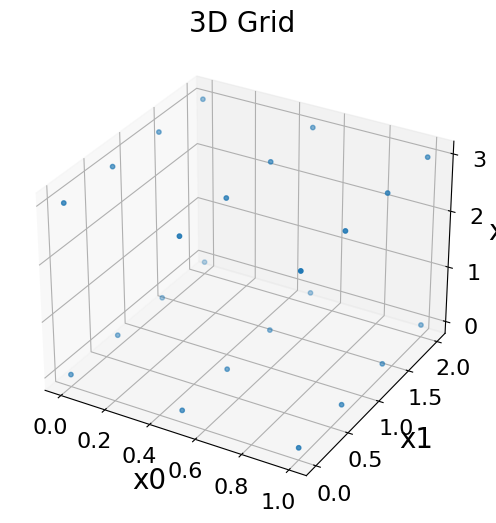

In [ ]:
# 2D grid example
df_2d = generate_grid_dataframe(ranges=[(0, 1), (0, 1)], resolutions=[5, 5])
plot_grid_dataframe(df_2d)

# 3D grid example
df_3d = generate_grid_dataframe(ranges=[(0, 1), (0, 2), (0, 3)], resolutions=[3, 4, 2])
plot_grid_dataframe(df_3d)
# df_3d.to_csv("/Users/tako/work/git/account_takotime808/multioutreg/docs/_static/example_datasets/grid_3N.csv", index=False)


In [1]:
import numpy as np
from scipy.stats import qmc
# from sklearn.datasets import make_blobs
from multioutreg.figures.umap_plot_classify import generate_umap_plot


def create_sampling_test_cases():
    test_cases = {
        "Grid": np.stack(np.meshgrid(
            np.linspace(0, 1, 20), np.linspace(0, 1, 20)), -1).reshape(-1, 2),

        "Random": np.random.rand(400, 2),

        "Sobol": qmc.Sobol(d=2, scramble=False).random(400),

        "LHS": qmc.LatinHypercube(d=2).random(400),

        "Uncertain": np.ones((50, 2))
    }

    results = {}
    for label, X in test_cases.items():
        _, result = generate_umap_plot(X, random_state=42)
        results[label] = {
            "detected": result["method"],
            "explanation": result["explanation"],
            "std": result["std"],
            "silhouette": result["silhouette"],
            "entropy": result["entropy"]
        }

    return results


results = create_sampling_test_cases()
print(results)


Bad key text.markup in file /Users/tako/.matplotlib/matplotlibrc, line 165 ("text.markup         : 'plain'  # Affects how text, such as titles and labels, are")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/tako/codes/miniconda3/envs/foo310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/tako/codes/miniconda3/envs/foo310/lib/python3.10/site-packages/scipy/stats/_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
/Users/tako/codes/miniconda3/envs/foo310/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use n

{'Grid': {'detected': 'Uncertain', 'explanation': 'Pattern unclear', 'std': 0.15239083472838497, 'silhouette': 0.39975059032440186, 'entropy': 3.079269333139621}, 'Random': {'detected': 'LHS', 'explanation': 'Moderate spread, higher entropy -> LHS', 'std': 0.09234096446927968, 'silhouette': 0.39698588848114014, 'entropy': 2.116233642012194}, 'Sobol': {'detected': 'LHS', 'explanation': 'Moderate spread, higher entropy -> LHS', 'std': 0.08893588881428013, 'silhouette': 0.3799360692501068, 'entropy': 3.1048625292499805}, 'LHS': {'detected': 'LHS', 'explanation': 'Moderate spread, higher entropy -> LHS', 'std': 0.08247575074522087, 'silhouette': 0.38634589314460754, 'entropy': 2.773670275454382}, 'Uncertain': {'detected': 'Grid', 'explanation': 'Low std and high silhouette -> Grid', 'std': 0.09142906608237222, 'silhouette': 0.3173234760761261, 'entropy': 2.878827175392477}}


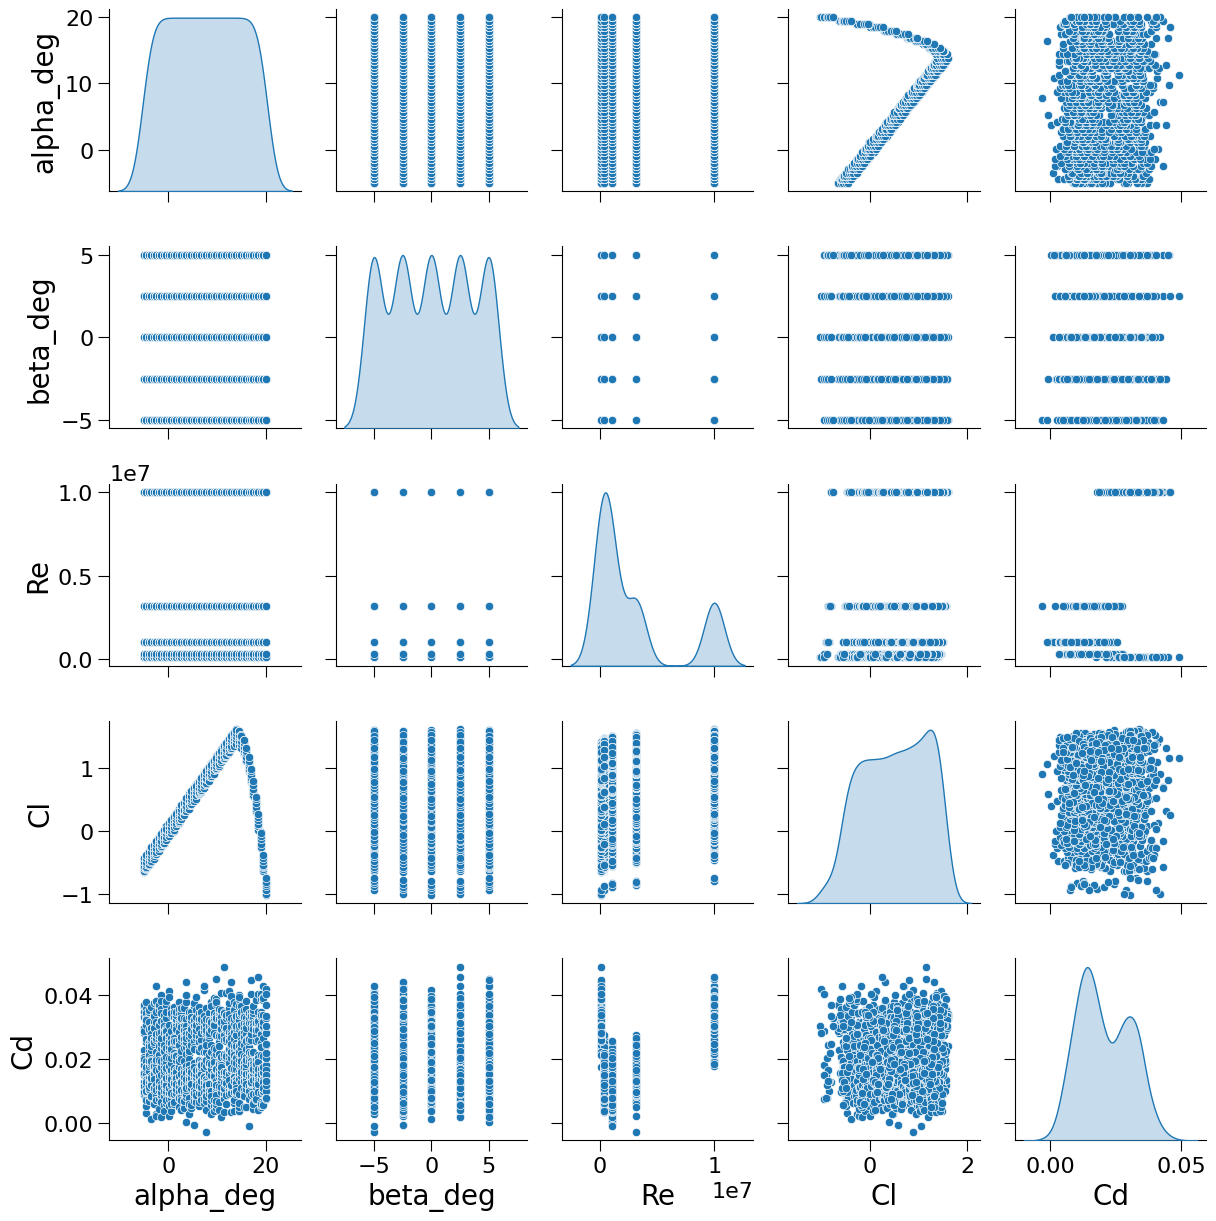

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to generate the synthetic CFD dataset
def generate_cfd_sweep_dataset(
    alpha_range: tuple = (-5, 20),
    beta_range: tuple = (-5, 5),
    reynolds_range: tuple = (1e5, 1e7),
    num_alpha: int = 50,
    num_beta: int = 5,
    num_re: int = 5,
    noise_std: float = 0.01,
    include_metadata: bool = False
) -> pd.DataFrame:
    alpha_vals = np.linspace(*alpha_range, num_alpha)
    beta_vals = np.linspace(*beta_range, num_beta)
    reynolds_vals = np.logspace(np.log10(reynolds_range[0]), np.log10(reynolds_range[1]), num_re)

    alpha_grid, beta_grid, re_grid = np.meshgrid(alpha_vals, beta_vals, reynolds_vals, indexing='ij')
    alpha = alpha_grid.ravel()
    beta = beta_grid.ravel()
    Re = re_grid.ravel()

    alpha_rad = np.radians(alpha)
    beta_rad = np.radians(beta)

    Cl = 2 * np.pi * alpha_rad * np.cos(beta_rad)
    Cl[Cl > 1.5] = 1.5 - 5 * (Cl[Cl > 1.5] - 1.5)**2
    Cl += 0.1 * (np.log10(Re / 1e6))
    Cl += np.random.normal(0, noise_std, size=Cl.shape)

    Cd = 0.01 + 0.02 * alpha_rad**2 + 0.01 * beta_rad**2
    Cd += 0.02 * (np.log10(Re / 1e6))**2
    Cd += np.random.normal(0, noise_std / 2, size=Cd.shape)

    return pd.DataFrame({
        "alpha_deg": alpha,
        "beta_deg": beta,
        "Re": Re,
        "Cl": Cl,
        "Cd": Cd
    })

# Generate the dataset
df = generate_cfd_sweep_dataset(include_metadata=True)

# Create the pairgrid plot
pair_plot = sns.pairplot(df, diag_kind='kde')

# Display the plot
plt.tight_layout()
plt.show()


Saved: surrogate_model_summary.png


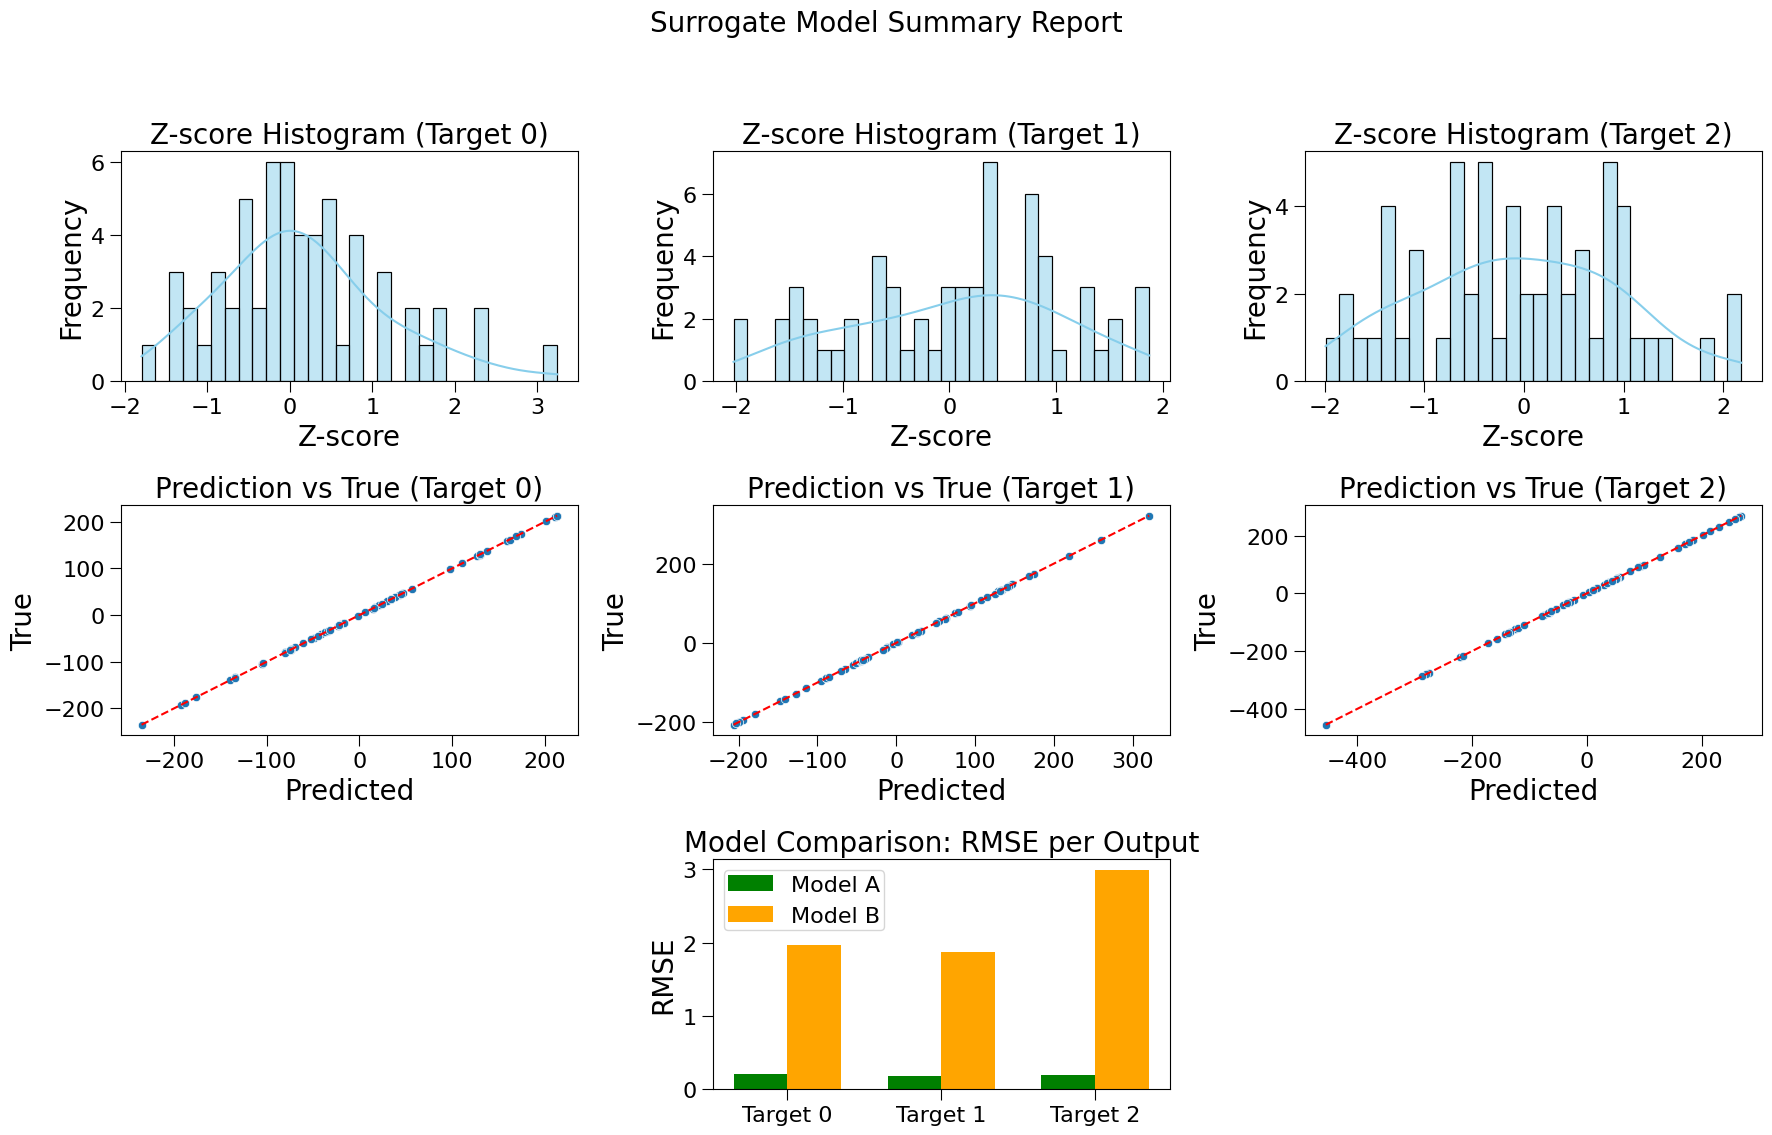

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic multi-output regression data
X, Y = make_regression(n_samples=200, n_features=5, n_targets=3, noise=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit a MultiOutput Linear Regression Model
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Simulate uncertainty estimates as constant std devs
residuals = Y_test - Y_pred
Y_std = np.std(residuals, axis=0, keepdims=True) * np.ones_like(Y_pred)

# Fit a second (noisy) model to simulate comparison
noise_model = MultiOutputRegressor(LinearRegression())
Y_train_noisy = Y_train + np.random.normal(0, 10, size=Y_train.shape)
noise_model.fit(X_train, Y_train_noisy)
Y_pred_noise = noise_model.predict(X_test)

# Calculate RMSEs
rmse_clean = np.sqrt(mean_squared_error(Y_test, Y_pred, multioutput='raw_values'))
rmse_noise = np.sqrt(mean_squared_error(Y_test, Y_pred_noise, multioutput='raw_values'))

# === Create Combined Figure ===
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Surrogate Model Summary Report", fontsize=20)

# --- Row 1: Z-score Histograms (Uncertainty Diagnostics)
for i in range(3):
    z_scores = (Y_test[:, i] - Y_pred[:, i]) / Y_std[:, i]
    sns.histplot(z_scores, bins=30, kde=True, ax=axes[0, i], color="skyblue")
    axes[0, i].set_title(f"Z-score Histogram (Target {i})")
    axes[0, i].set_xlabel("Z-score")
    axes[0, i].set_ylabel("Frequency")

# --- Row 2: Prediction vs True (Interpretability)
for i in range(3):
    sns.scatterplot(x=Y_pred[:, i], y=Y_test[:, i], ax=axes[1, i])
    axes[1, i].plot([Y_test[:, i].min(), Y_test[:, i].max()],
                    [Y_test[:, i].min(), Y_test[:, i].max()], 'r--')
    axes[1, i].set_title(f"Prediction vs True (Target {i})")
    axes[1, i].set_xlabel("Predicted")
    axes[1, i].set_ylabel("True")

# --- Row 3: RMSE Comparison
ax_rmse = axes[2, 1]
width = 0.35
indices = np.arange(3)
ax_rmse.bar(indices - width/2, rmse_clean, width, label='Model A', color='green')
ax_rmse.bar(indices + width/2, rmse_noise, width, label='Model B', color='orange')
ax_rmse.set_xticks(indices)
ax_rmse.set_xticklabels([f"Target {i}" for i in range(3)])
ax_rmse.set_ylabel("RMSE")
ax_rmse.set_title("Model Comparison: RMSE per Output")
ax_rmse.legend()

# Hide unused plots
axes[2, 0].axis('off')
axes[2, 2].axis('off')

# Adjust layout and save
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("surrogate_model_summary.png", dpi=300)
print("Saved: surrogate_model_summary.png")


<!-- # Copyright (c) 2025 takotime808 -->

## Multi-output Ordered Intervals Plot ##

```
pip intall matplotlib==3.10.3
pip intall seaborn==0.11.2
```


Bad key text.markup in file /Users/tako/.matplotlib/matplotlibrc, line 165 ("text.markup         : 'plain'  # Affects how text, such as titles and labels, are")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.10.3/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution
/Users/tako/codes/miniconda3/envs/foo310/lib/python3.10/site-packages/multioutreg/figures/confidence_intervals.py:202: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.13)


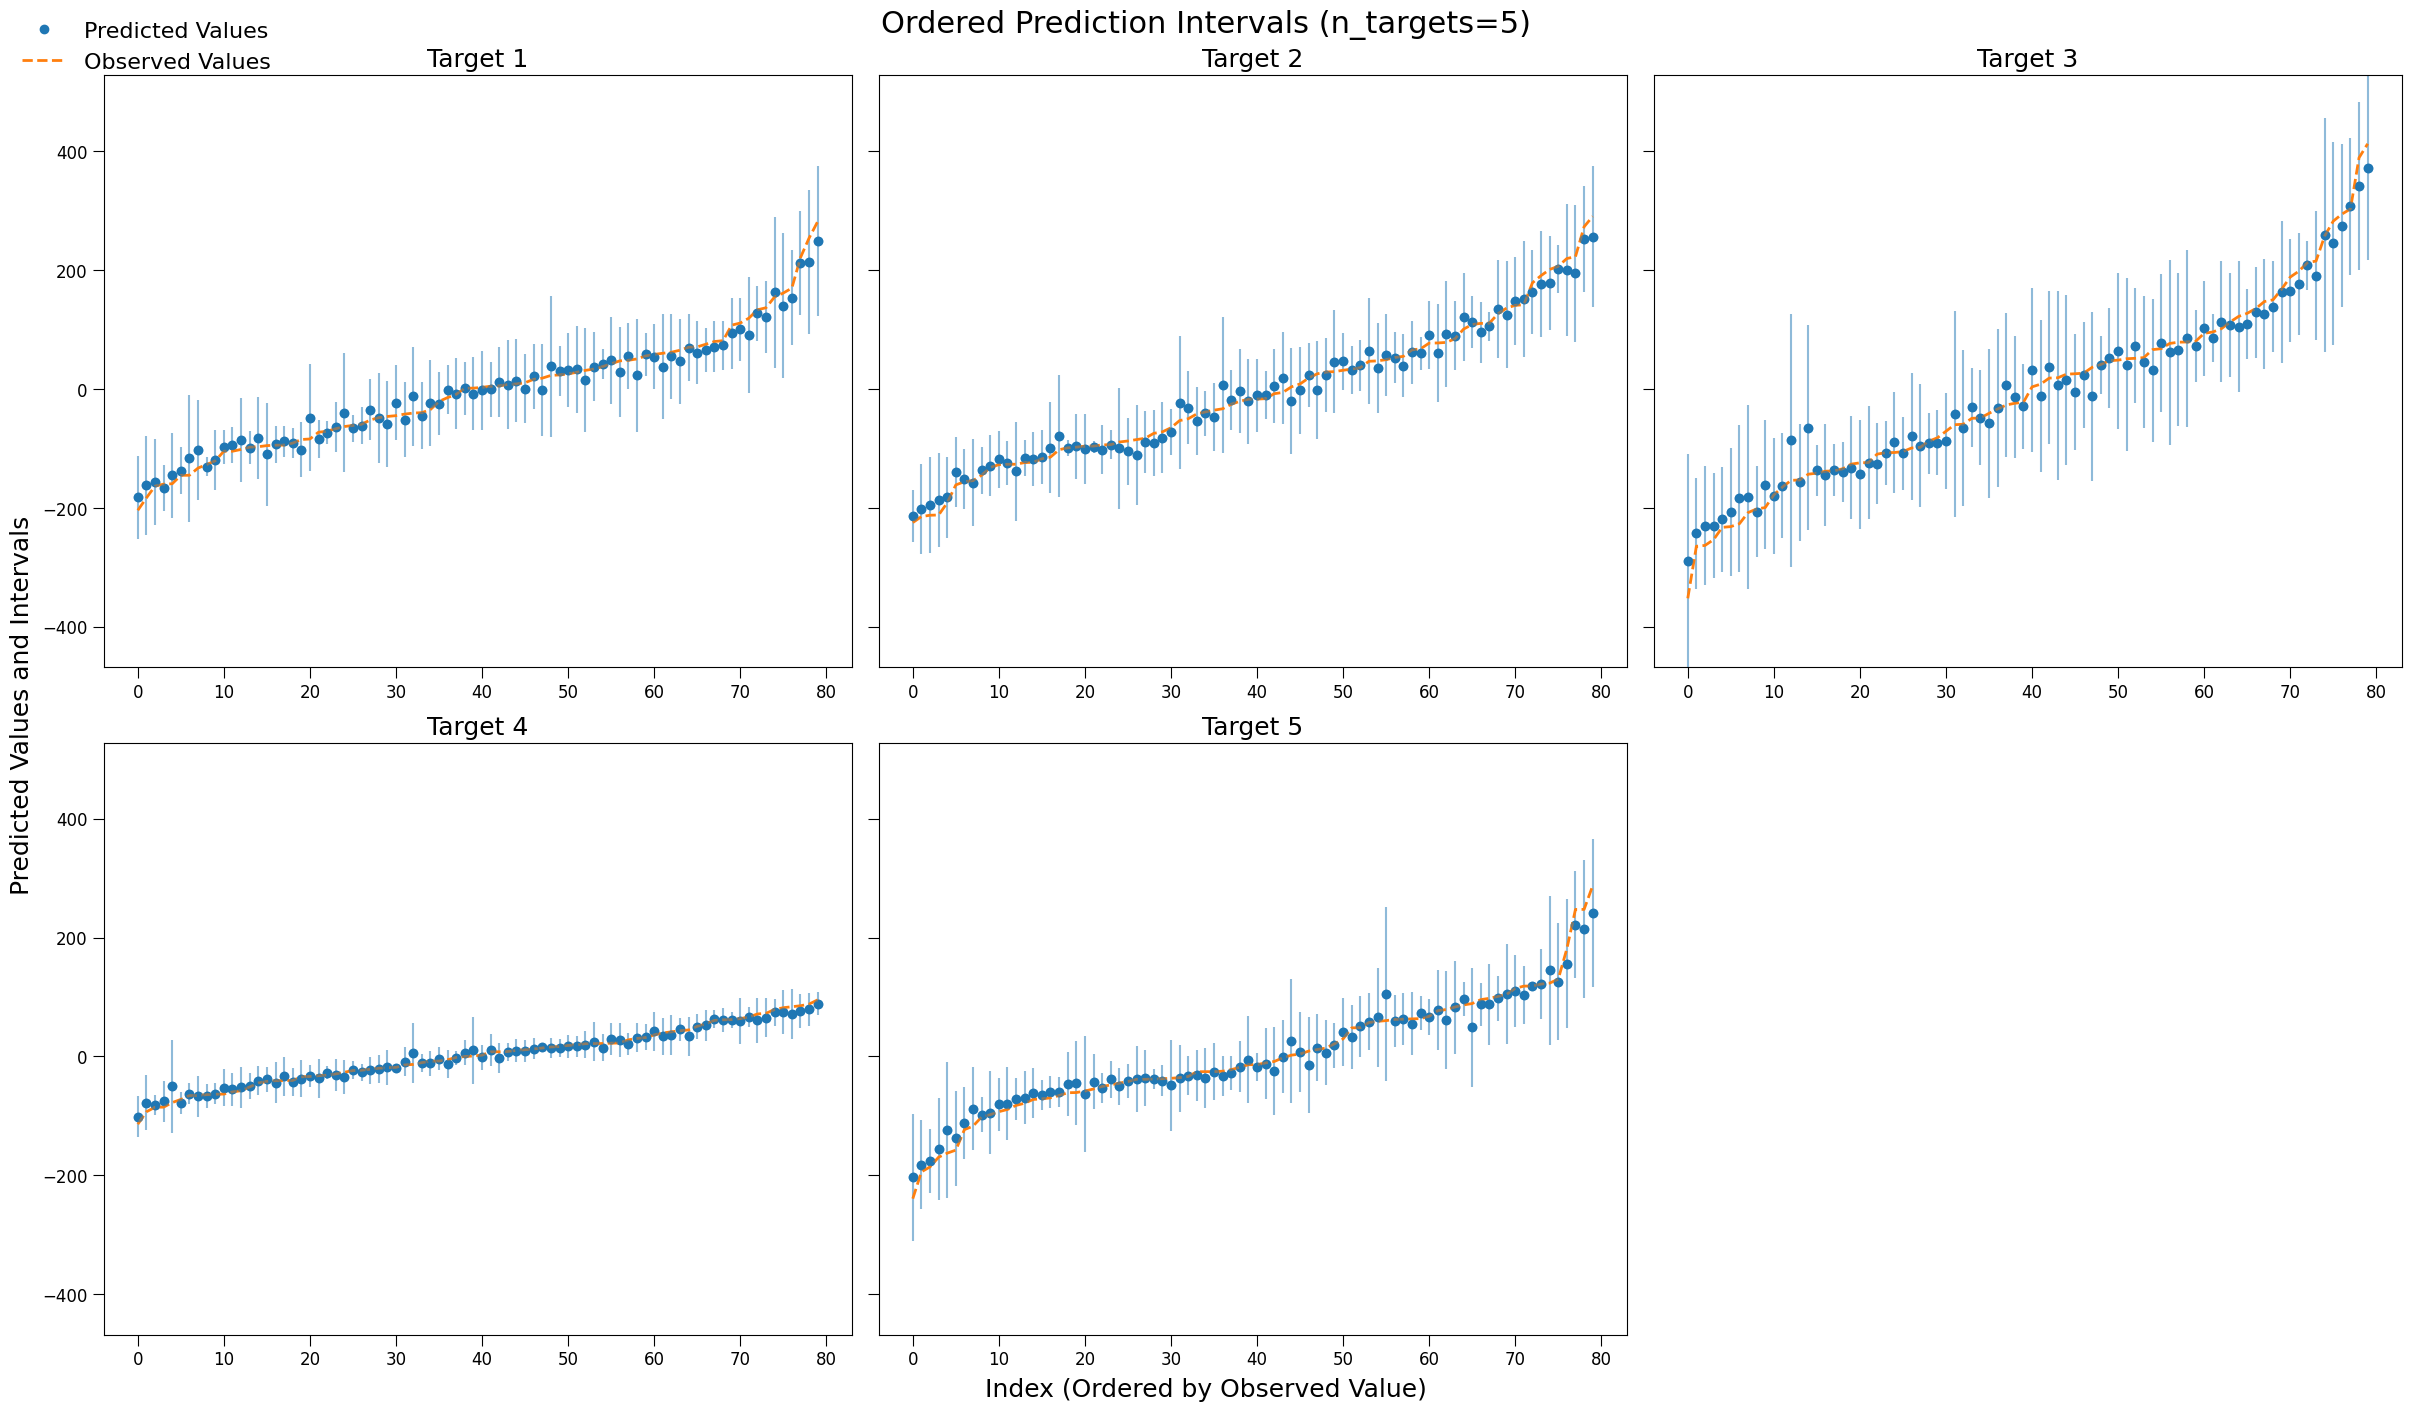

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from multioutreg.figures.confidence_intervals import (
    plot_intervals_ordered_multi,
)


# --- n_targets=2 example ---
n_targets = 5
X, y = make_regression(n_samples=80, n_features=4, n_targets=n_targets, noise=8, random_state=0)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=30, random_state=42)).fit(X, y)
y_pred = model.predict(X)
y_std = np.zeros_like(y_pred)
for i, est in enumerate(model.estimators_):
    all_preds = np.stack([tree.predict(X) for tree in est.estimators_], axis=1)
    y_std[:, i] = all_preds.std(axis=1)

target_list = ["Target {i}" for i in range(n_targets)]

plot_intervals_ordered_multi(
    y_pred, y_std, y,
    suptitle="Ordered Prediction Intervals",
    max_cols=3,
    base_width=8,
    base_height=7,
    target_list=target_list,
    # savefig="../docs/_static/images/intervals.png",
)
# plt.show()



<!-- # Copyright (c) 2025 takotime808 -->

## Multi-output Residual Plots ##

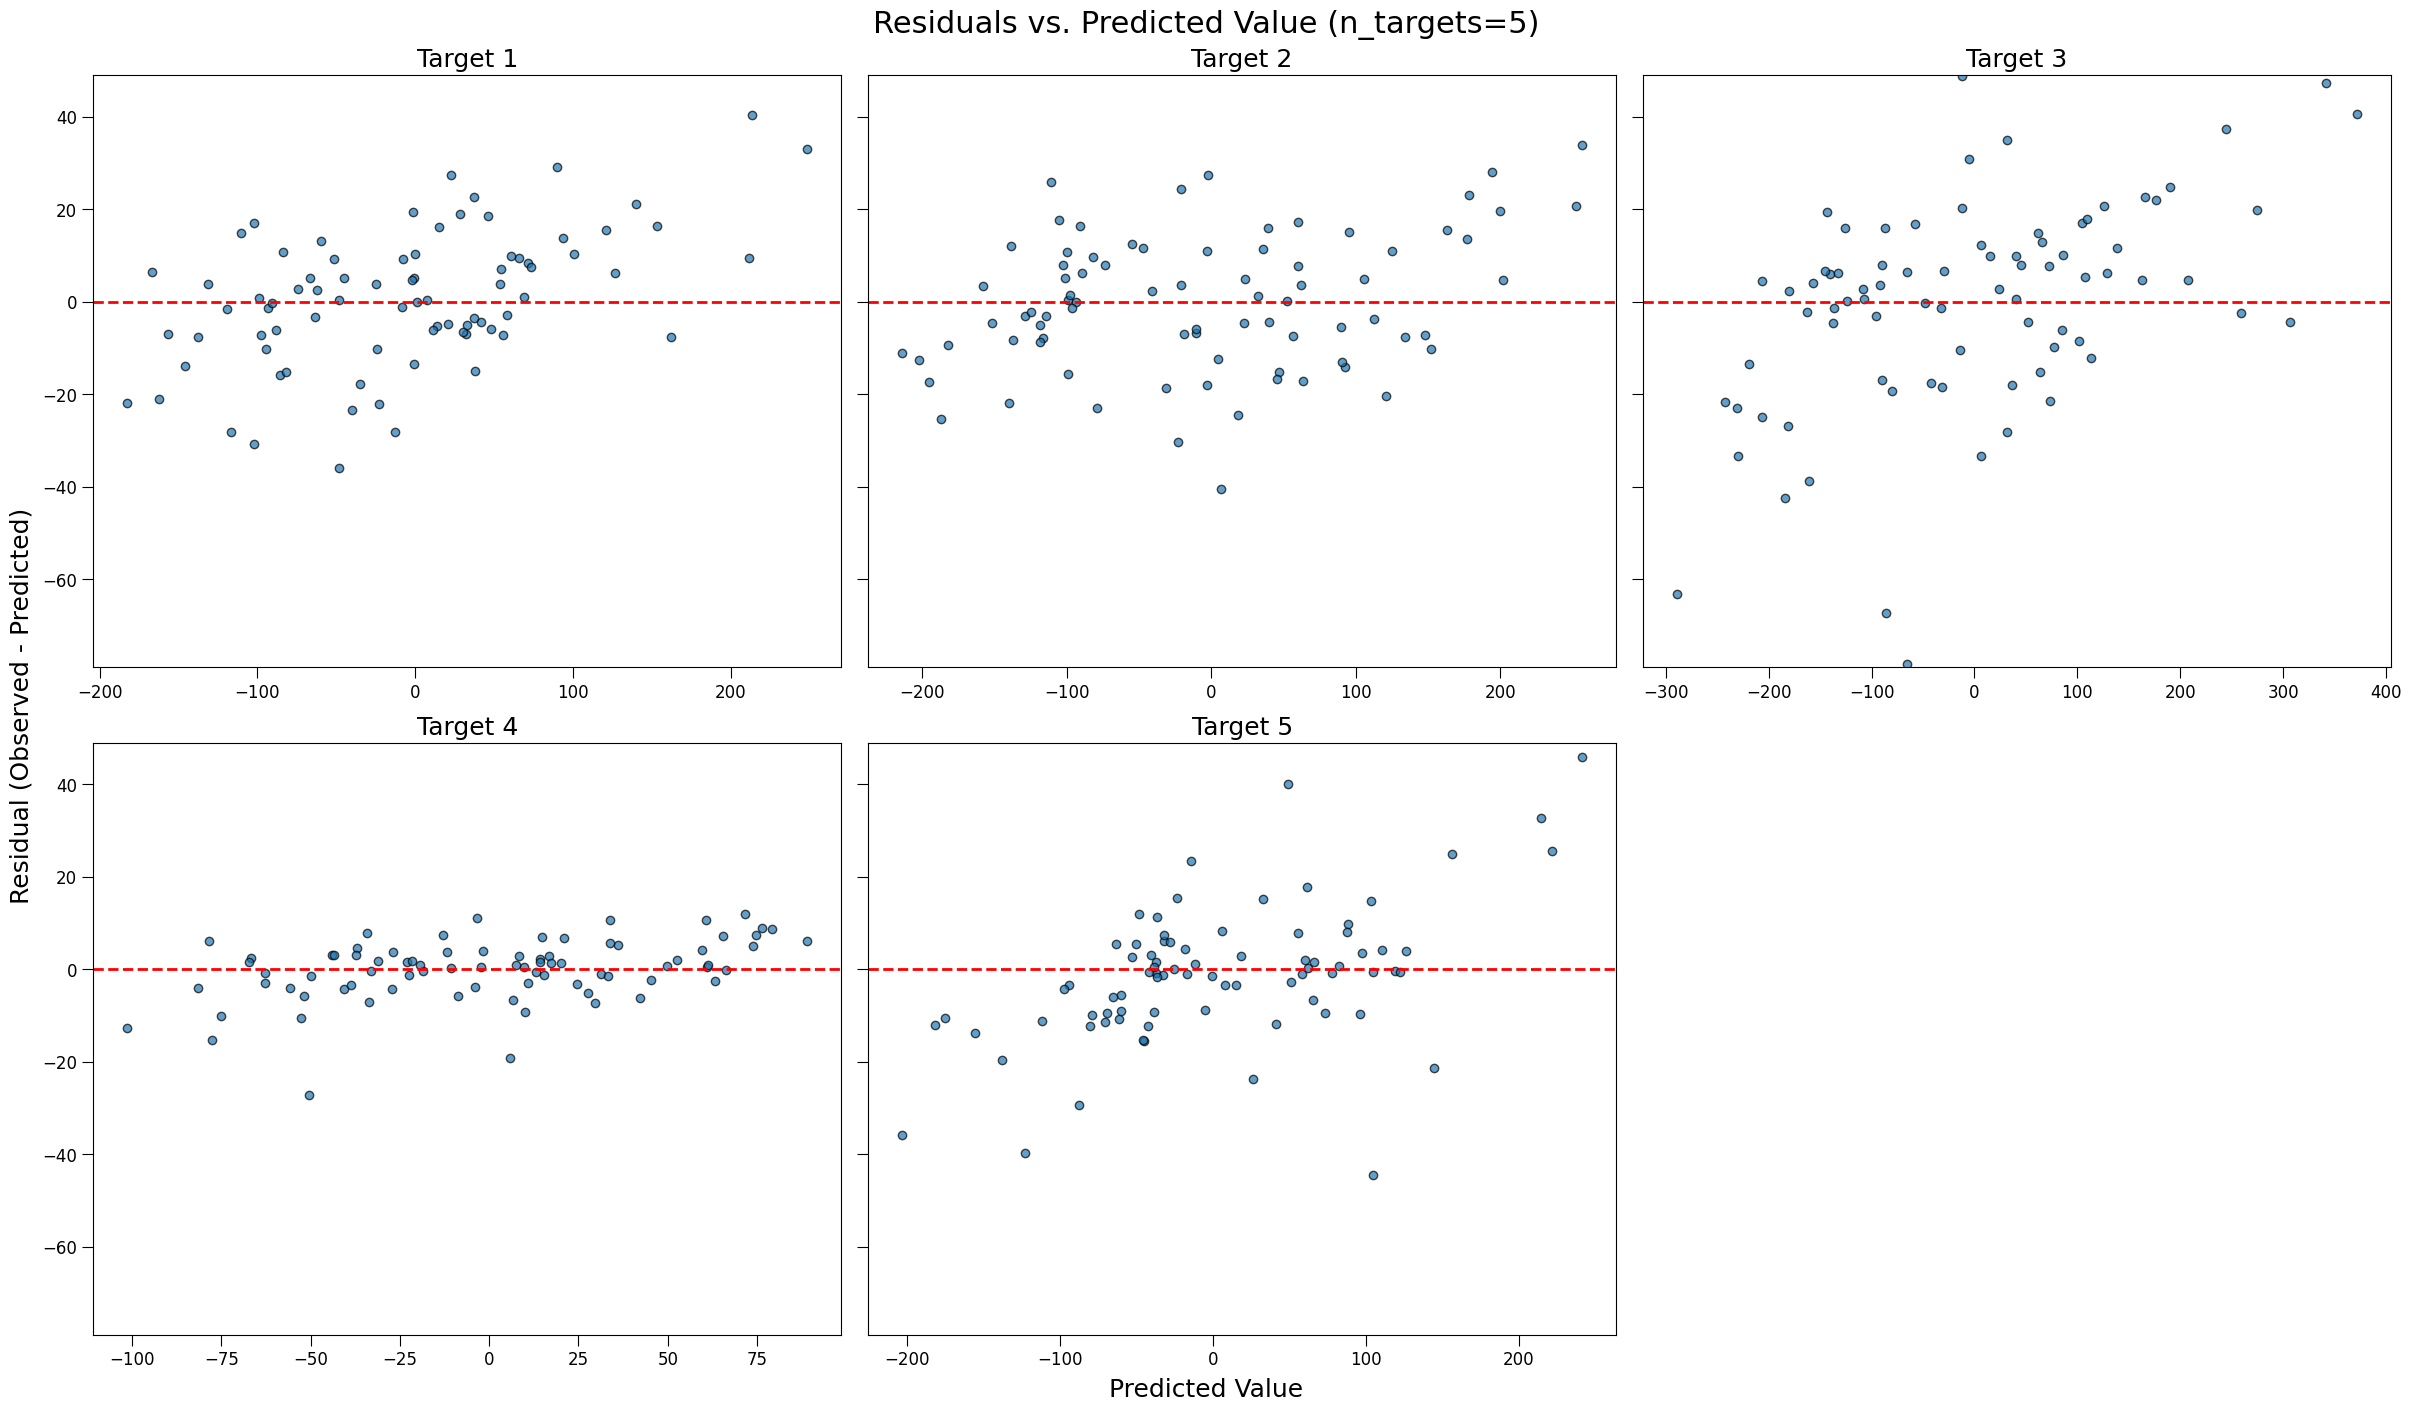

array([<Axes: title={'center': 'Target 1'}>,
       <Axes: title={'center': 'Target 2'}>,
       <Axes: title={'center': 'Target 3'}>,
       <Axes: title={'center': 'Target 4'}>,
       <Axes: title={'center': 'Target 5'}>], dtype=object)

In [2]:
from multioutreg.figures.residuals import (
    plot_residuals_multioutput,
)
# Example: n_targets = 3
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

n_targets = 5
X, y = make_regression(n_samples=80, n_features=4, n_targets=n_targets, noise=8, random_state=0)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=30, random_state=42)).fit(X, y)
y_pred = model.predict(X)
plot_residuals_multioutput(y_pred, y)


<!-- # Copyright (c) 2025 takotime808 -->
## Ordered Interval Plots with `sns.regplot` ##

```sh
pip install matplotlib==3.10.3
pip install seaborn==0.13.2
```

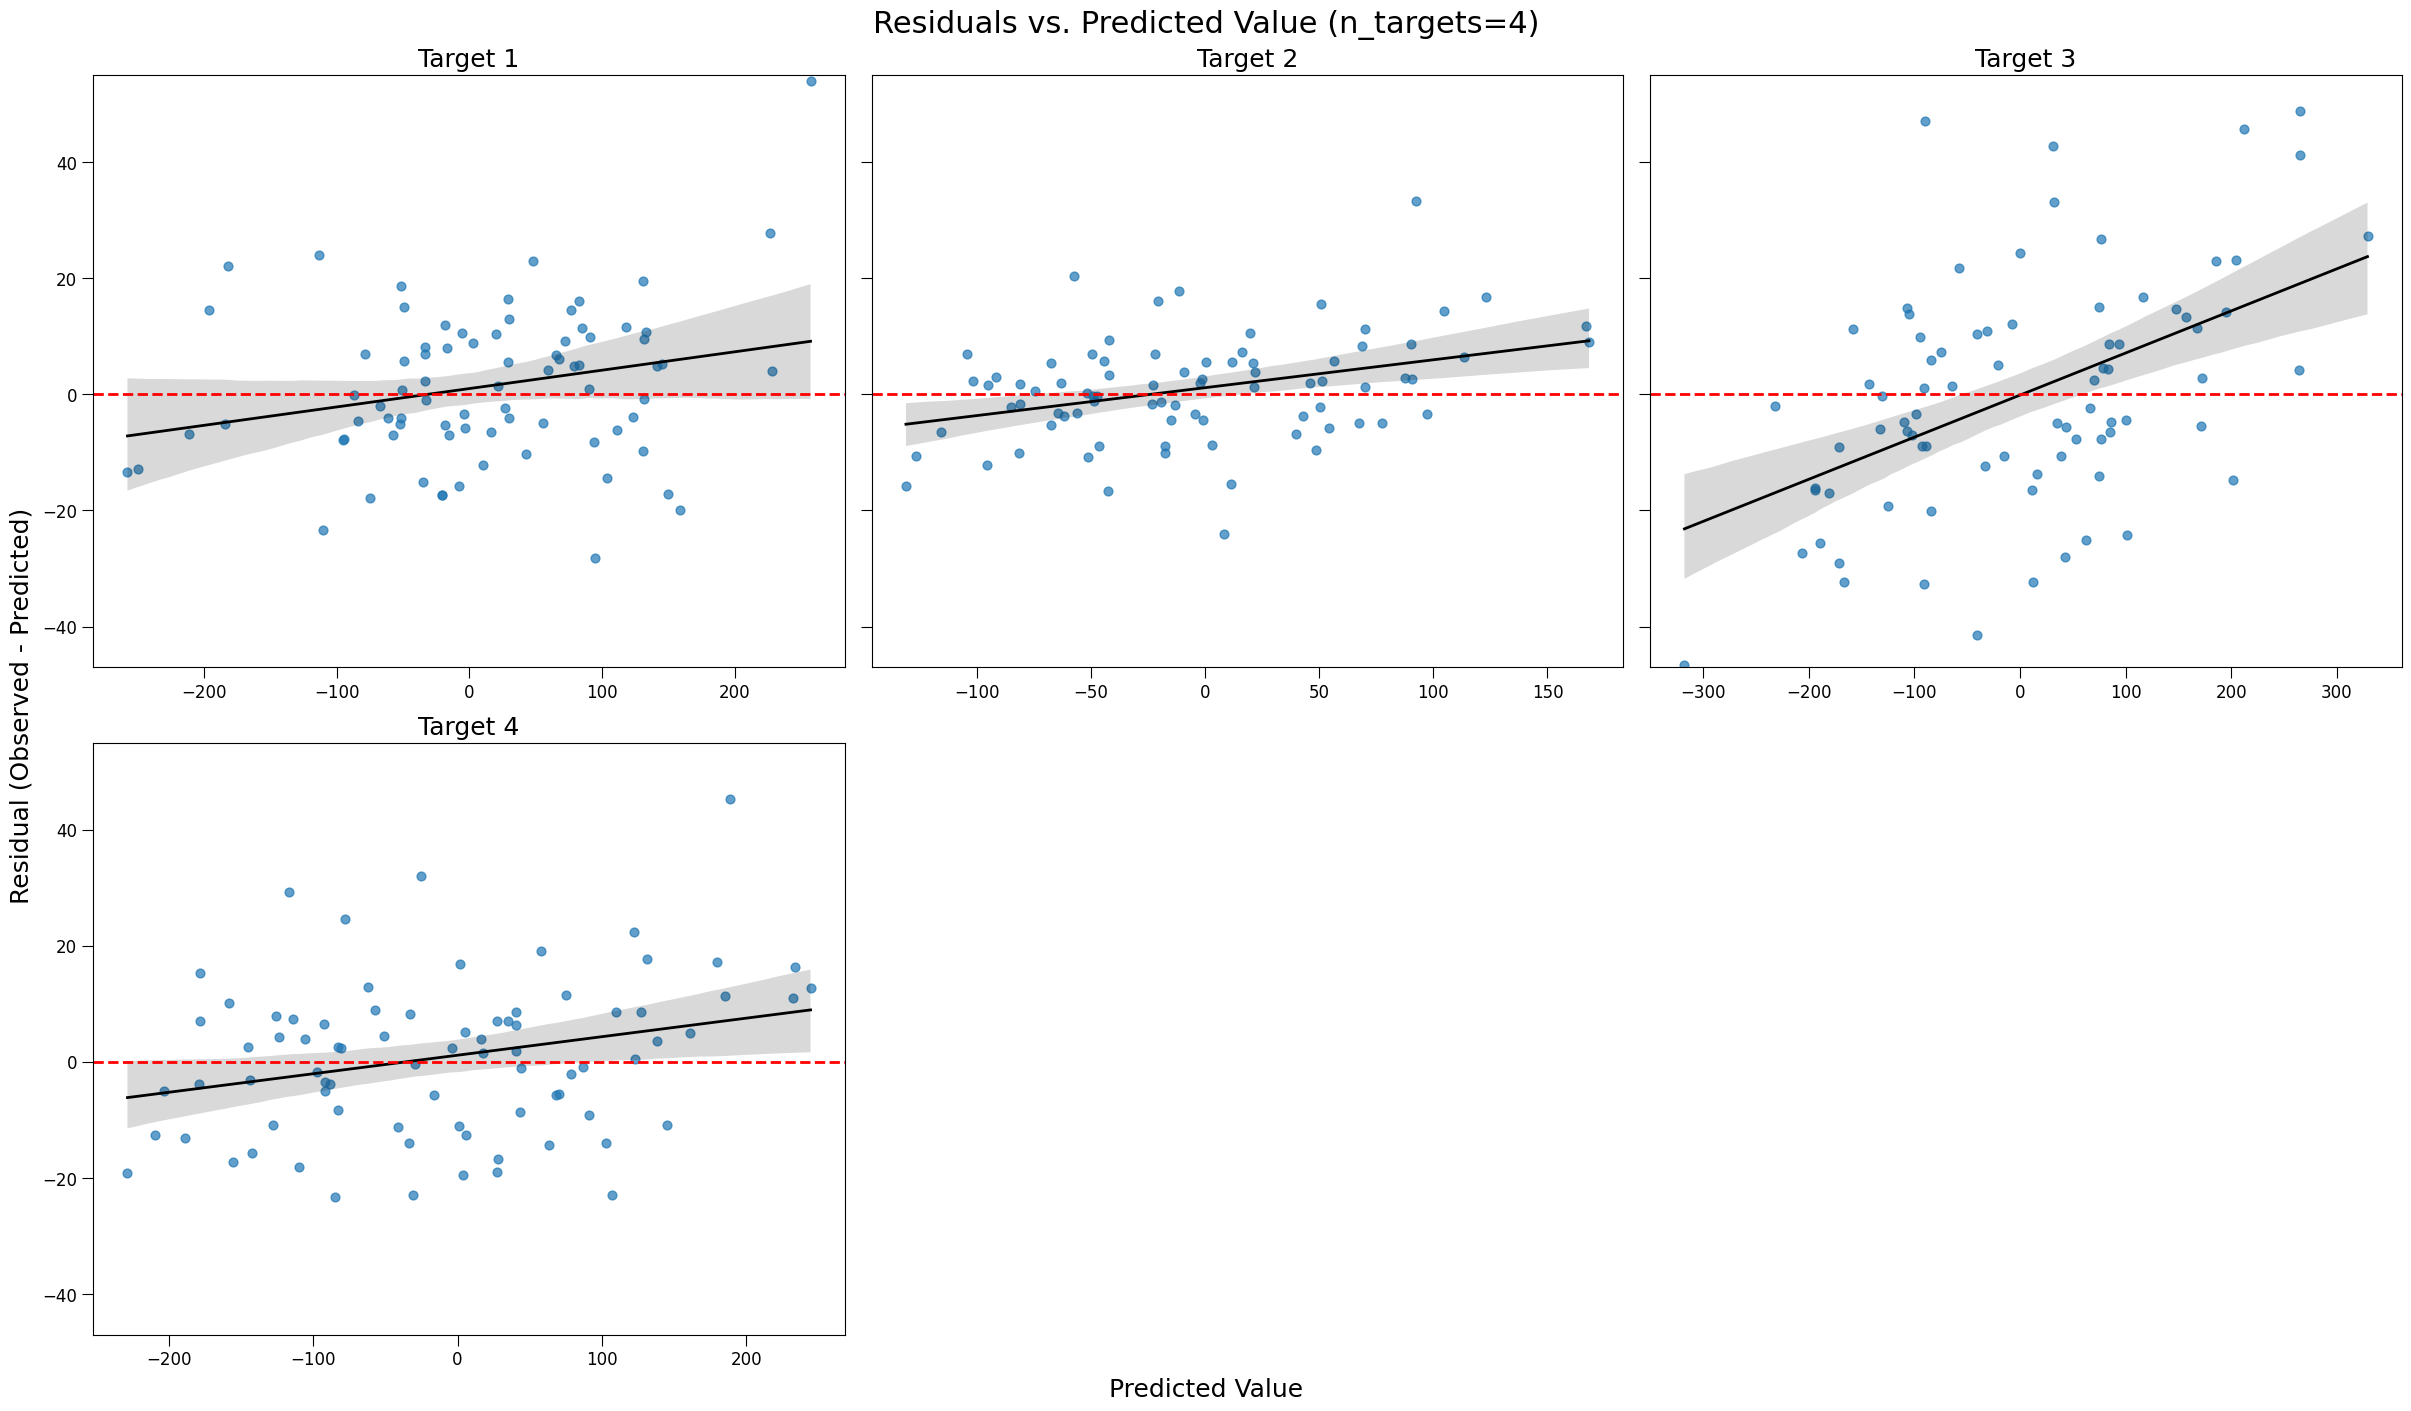

array([<Axes: title={'center': 'Target 1'}>,
       <Axes: title={'center': 'Target 2'}>,
       <Axes: title={'center': 'Target 3'}>,
       <Axes: title={'center': 'Target 4'}>], dtype=object)

In [3]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from multioutreg.figures.residuals import (
    plot_residuals_multioutput_with_regplot,
)

n_targets = 4
X, y = make_regression(n_samples=80, n_features=4, n_targets=n_targets, noise=8, random_state=0)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=30, random_state=42)).fit(X, y)
y_pred = model.predict(X)
plot_residuals_multioutput_with_regplot(y_pred, y)


<!-- # Copyright (c) 2025 takotime808 -->
----

## Ordered Interval Plots with uncertainty-toolbox ##

This notebook demonstrates how to use `plot_intervals_ordered_multioutput` from `multioutreg/figures/uncertainty_toolbox_extension.py` to visualize prediction intervals for each target of a multi-output regressor.

**Install dependencies if needed (execute if running in fresh environment)**
```sh
pip install uncertainty-toolbox scikit-learn matplotlib
```


**Imports**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

from multioutreg.figures import uncertainty_toolbox_extension as ute


<!-- # Copyright (c) 2025 takotime808 -->

**Generate multi-output regression data**

In [5]:
# Generate synthetic data
X, Y = make_regression(
    n_samples=200,
    n_features=8,
    n_targets=3,
    noise=8.0,
    random_state=0
)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fit a MultiOutputRegressor with RandomForest
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=50, random_state=1))
model.fit(X_train, Y_train)

# Compute means and stds for prediction intervals via the forest ensemble
y_preds = []
y_stds = []
for i, est in enumerate(model.estimators_):
    # shape (n_trees, n_samples)
    all_preds = np.array([tree.predict(X_test) for tree in est.estimators_])
    y_preds.append(np.mean(all_preds, axis=0))
    y_stds.append(np.std(all_preds, axis=0))
y_pred = np.stack(y_preds, axis=1)  # (n_samples, n_outputs)
y_std = np.stack(y_stds, axis=1)


<!-- # Copyright (c) 2025 takotime808 -->

**Plot ordered prediction intervals for each target**

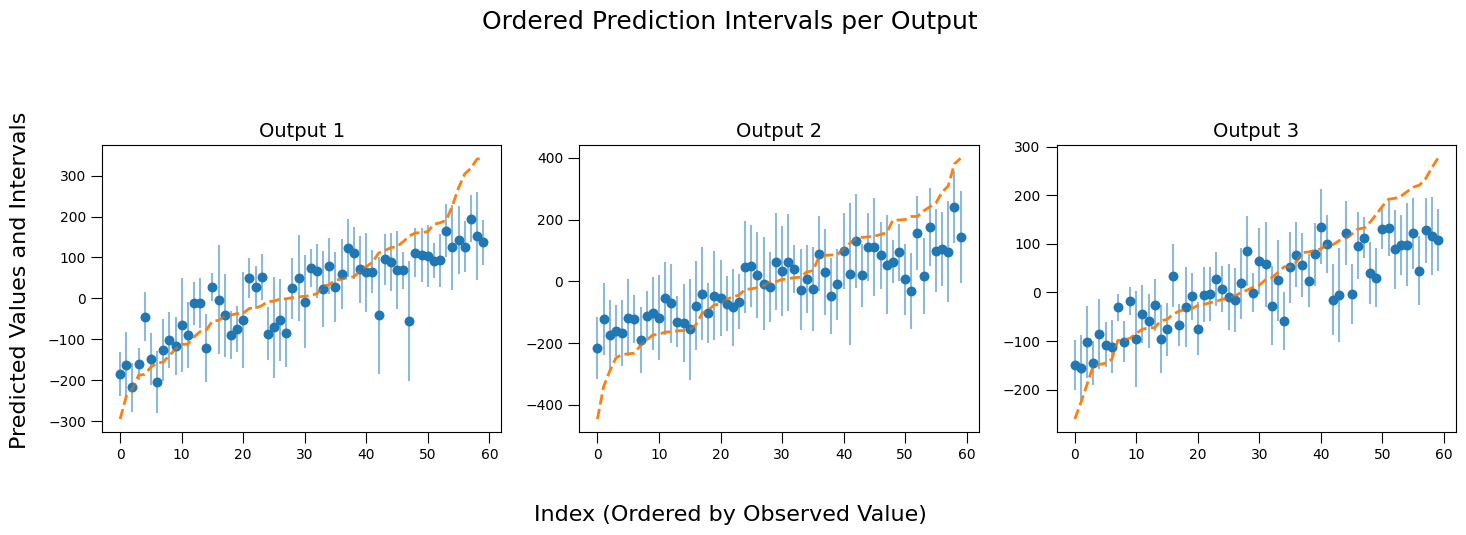

<Figure size 1000x1000 with 0 Axes>

In [6]:
axes = ute.plot_uct_intervals_ordered_multioutput(
    y_pred=y_pred,
    y_std=y_std,
    y_true=Y_test,
    num_stds_confidence_bound=1,
    savefig = False,
    suptitle = "Ordered Prediction Intervals per Output",
    # supxlabel = "Index (Ordered by Observed Value)",
    # supylabel = "Predicted Values and Intervals",
)

plt.suptitle("Ordered Prediction Intervals per Output", fontsize=18, y=1.04)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # or adjust the rect as needed
plt.show()



<!-- # Copyright (c) 2025 takotime808 -->
----

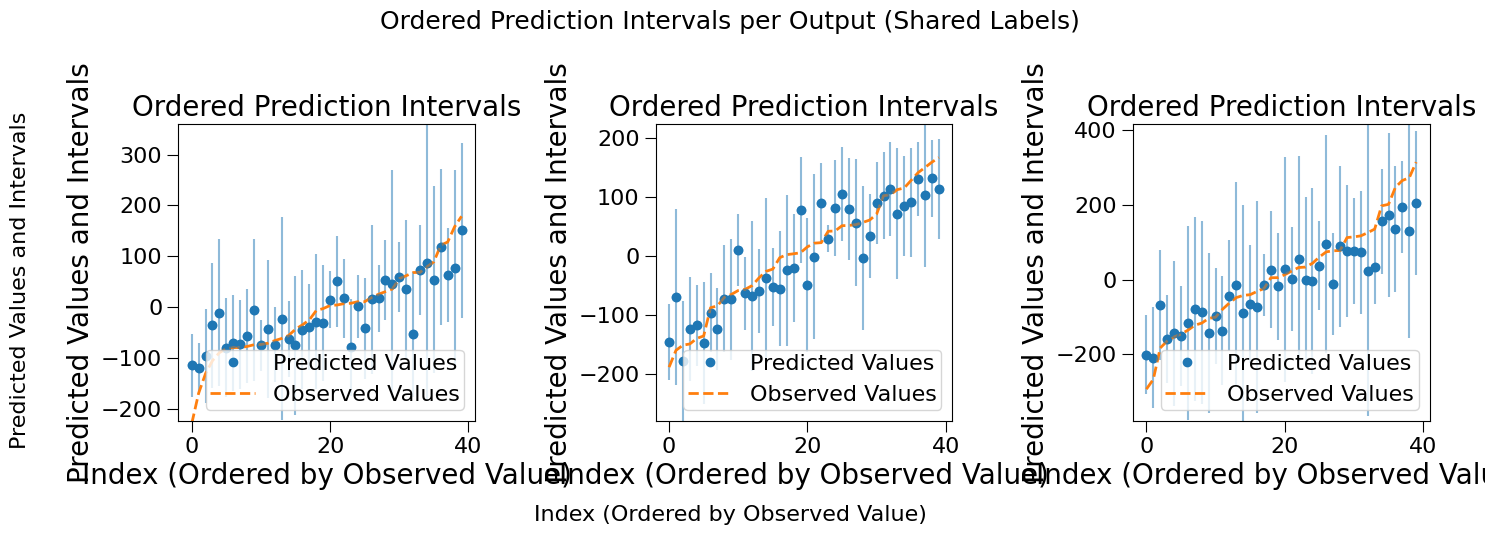

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
import uncertainty_toolbox as uct
from typing import List, Tuple, Union
from matplotlib.axes import Axes

def plot_uct_intervals_ordered_multioutput(
    y_pred: np.ndarray,
    y_std: np.ndarray,
    y_true: np.ndarray,
    ax_list: Union[List[Axes], None] = None,
    n_subset: Union[int, None] = None,
    num_stds_confidence_bound: int = 2,
    savefig: str = False,
    suptitle: str = "Ordered Prediction Intervals per Output",
    ylims: Union[Tuple[float, float], None] = None,
    supxlabel: str = "Index (Ordered by Observed Value)",
    supylabel: str = "Predicted Values and Intervals",
) -> List[Axes]:
    """
    Plot ordered prediction intervals for multi-dimensional outputs with shared x and y labels.
    """
    y_pred = np.asarray(y_pred)
    y_std = np.asarray(y_std)
    y_true = np.asarray(y_true)

    if y_pred.ndim == 1:
        ax = uct.plot_intervals_ordered(
            y_pred,
            y_std,
            y_true,
            n_subset=n_subset,
            ylims=ylims,
            num_stds_confidence_bound=num_stds_confidence_bound,
            ax=ax_list[0] if isinstance(ax_list, (list, np.ndarray)) else ax_list,
        )
        fig = plt.gcf()
        fig.supxlabel(supxlabel, fontsize=16)
        fig.supylabel(supylabel, fontsize=16)
        plt.suptitle(suptitle, fontsize=18, y=1.04)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        if savefig:
            plt.savefig(savefig)
            plt.close()
        else:
            plt.show()
        return [ax]

    if not (y_pred.ndim == y_std.ndim == y_true.ndim == 2):
        raise ValueError("y_pred, y_std, and y_true must be 2D arrays")
    if not (y_pred.shape == y_std.shape == y_true.shape):
        raise ValueError("y_pred, y_std, and y_true must have the same shape")

    n_outputs = y_pred.shape[1]

    if ax_list is None:
        fig, ax_list = plt.subplots(1, n_outputs, figsize=(5 * n_outputs, 5))
    else:
        fig = plt.gcf()

    axes = np.atleast_1d(ax_list).ravel()
    out_axes = []
    for i in range(n_outputs):
        ax_i = axes[i]
        # Remove individual axis labels if present
        ax_i.set_xlabel("")
        ax_i.set_ylabel("")
        ax_i = uct.plot_intervals_ordered(
            y_pred[:, i],
            y_std[:, i],
            y_true[:, i],
            n_subset=n_subset,
            ylims=ylims,
            num_stds_confidence_bound=num_stds_confidence_bound,
            ax=ax_i,
        )
        out_axes.append(ax_i)

    fig.supxlabel(supxlabel, fontsize=16)
    fig.supylabel(supylabel, fontsize=16)
    plt.suptitle(suptitle, fontsize=18, y=1.04)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    if savefig:
        plt.savefig(savefig)
        plt.close()
    else:
        plt.show()
    return out_axes

# --- Demo: generate synthetic data and plot using the above function ---

# Generate synthetic data
X, Y = make_regression(
    n_samples=120,
    n_features=5,
    n_targets=3,
    noise=10.0,
    random_state=0
)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

# Fit model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=50, random_state=1))
model.fit(X_train, Y_train)

# Predict and estimate uncertainty via ensemble std
y_preds = []
y_stds = []
for est in model.estimators_:
    all_preds = np.array([tree.predict(X_test) for tree in est.estimators_])
    y_preds.append(np.mean(all_preds, axis=0))
    y_stds.append(np.std(all_preds, axis=0))
y_pred = np.stack(y_preds, axis=1)
y_std = np.stack(y_stds, axis=1)

# Show plot with shared x/y labels
axes = plot_uct_intervals_ordered_multioutput(
    y_pred, y_std, Y_test,
    num_stds_confidence_bound=2,
    suptitle="Ordered Prediction Intervals per Output (Shared Labels)",
    supxlabel="Index (Ordered by Observed Value)",
    supylabel="Predicted Values and Intervals"
)



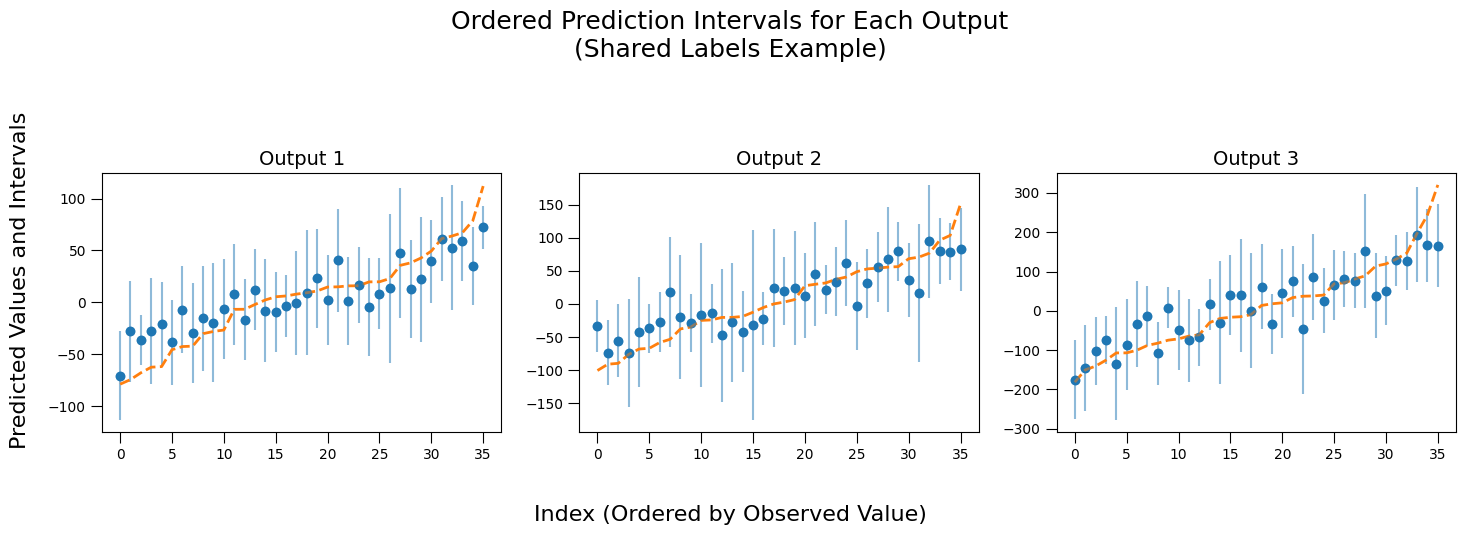

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from multioutreg.figures.uncertainty_toolbox_extension import (
    plot_uct_intervals_ordered_multioutput,
)

# ---- Assume the plot_uct_intervals_ordered_multioutput function is defined above ----
# (You can paste your function definition here)

# 1. Create some fake multi-output regression data
X, Y = make_regression(
    n_samples=120,
    n_features=4,
    n_targets=3,
    noise=15.0,
    random_state=42
)

# 2. Split train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# 3. Fit multi-output RandomForest (for "mean" and "std" via ensemble spread)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=40, random_state=1))
model.fit(X_train, Y_train)

# 4. For each output, estimate mean and std over trees
y_preds = []
y_stds = []
for est in model.estimators_:
    all_preds = np.array([tree.predict(X_test) for tree in est.estimators_])
    y_preds.append(all_preds.mean(axis=0))
    y_stds.append(all_preds.std(axis=0))
y_pred = np.stack(y_preds, axis=1)  # (n_samples, n_outputs)
y_std = np.stack(y_stds, axis=1)

# 5. Plot prediction intervals for all outputs
axes = plot_uct_intervals_ordered_multioutput(
    y_pred,
    y_std,
    Y_test,
    suptitle="Ordered Prediction Intervals for Each Output\n(Shared Labels Example)",
    supxlabel="Index (Ordered by Observed Value)",
    supylabel="Predicted Values and Intervals",
    num_stds_confidence_bound=2
)
plt.show()


<!-- # Copyright (c) 2025 takotime808 -->
----
# `uct` Calibration Extension #

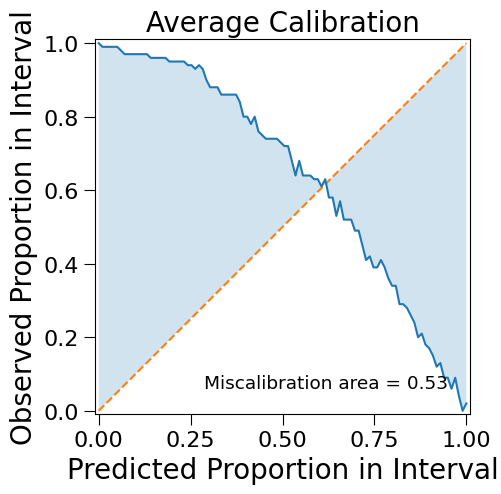

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from multioutreg.figures.uct_calibration_extension import (
    plot_calibration
)

np.random.seed(42)
n = 100
y_true = np.random.normal(0, 1, size=n)
y_pred = y_true + np.random.normal(0, 0.5, size=n)
y_std = np.abs(np.random.normal(0.8, 0.2, size=n))  # slightly underconfident

ax = plot_calibration(y_pred, y_std, y_true)
plt.show()

----
----
----

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

def ordered_interval_plot_multioutputregressor(X, y, model=None, ax=None, order_by='pred'):
    """
    Plots ordered interval plots for each output variable of a MultiOutputRegressor.

    Parameters:
        X: Feature matrix (n_samples, n_features)
        y: Target matrix (n_samples, n_outputs) or (n_samples,)
        model: Trained MultiOutputRegressor (if None, a new one is fit)
        ax: Matplotlib axes (optional)
        order_by: 'pred' or 'true' — order by prediction or ground truth
    """
    # Ensure y is 2D for uniformity
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    n_targets = y.shape[1]

    if model is None:
        base = RandomForestRegressor(n_estimators=50, random_state=0)
        if n_targets == 1:
            model = base.fit(X, y.ravel())
        else:
            model = MultiOutputRegressor(base).fit(X, y)
    y_pred = model.predict(X)
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 1)
    
    # Estimate uncertainty (std of per-tree predictions)
    y_std = np.zeros_like(y_pred)
    if n_targets == 1:
        all_preds = np.stack([tree.predict(X) for tree in model.estimators_], axis=1)
        y_std[:, 0] = all_preds.std(axis=1)
    else:
        for i, estimator in enumerate(model.estimators_):
            all_preds = np.stack([tree.predict(X) for tree in estimator.estimators_], axis=1)
            y_std[:, i] = all_preds.std(axis=1)
    
    # Plot
    fig, axes = plt.subplots(n_targets, 1, figsize=(8, 2.5 * n_targets), sharex=True)
    if n_targets == 1:
        axes = [axes]
    for i, ax in enumerate(axes):
        # Sorting
        sort_idx = np.argsort(y_pred[:, i]) if order_by == 'pred' else np.argsort(y[:, i])
        ax.errorbar(
            np.arange(len(sort_idx)),
            y_pred[sort_idx, i],
            yerr=y_std[sort_idx, i],
            fmt='o', capsize=3, label='Prediction ± Uncertainty'
        )
        ax.scatter(np.arange(len(sort_idx)), y[sort_idx, i], alpha=0.5, color='black', label='True')
        ax.set_title(f"Output {i+1}")
        ax.set_ylabel("Prediction")
        ax.legend()
    plt.xlabel("Ordered sample index")
    plt.tight_layout()
    plt.show()


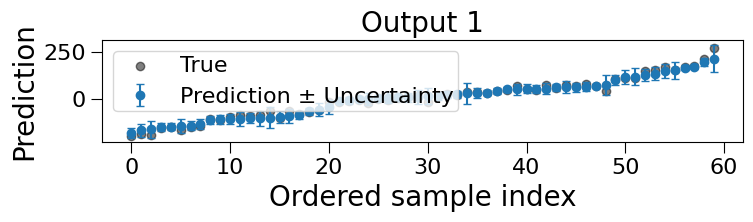

In [11]:
# --- TEST: Single-output ---
X1, y1 = make_regression(n_samples=60, n_features=4, n_targets=1, noise=15, random_state=42)
ordered_interval_plot_multioutputregressor(X1, y1)

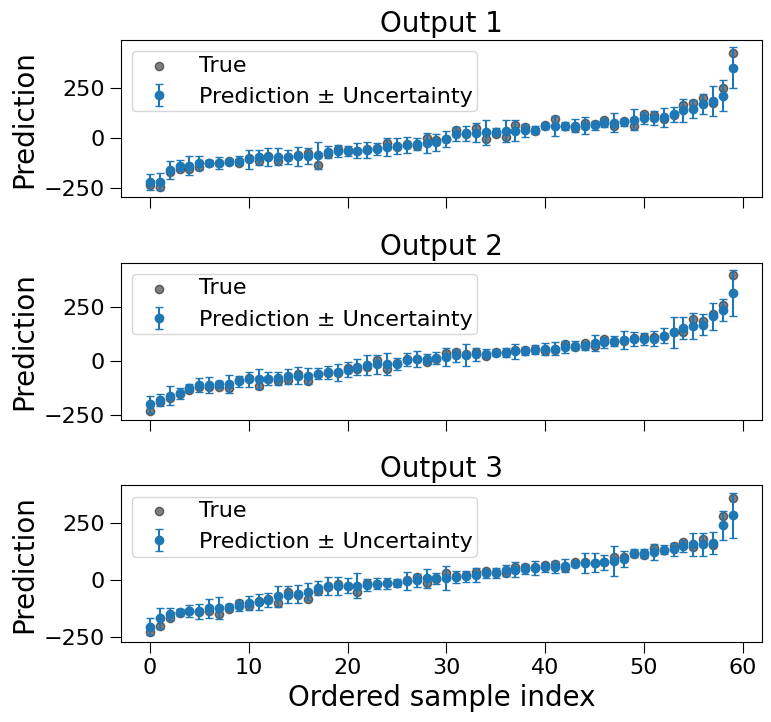

In [12]:
# --- TEST: Multi-output ---
X2, y2 = make_regression(n_samples=60, n_features=4, n_targets=3, noise=15, random_state=42)
ordered_interval_plot_multioutputregressor(X2, y2)

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# from typing import Union, Tuple, List
# from math import ceil
# from sklearn.datasets import make_regression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.multioutput import MultiOutputRegressor

# def plot_intervals_ordered(
#     y_pred: np.ndarray,
#     y_std: np.ndarray,
#     y_true: np.ndarray,
#     n_subset: Union[int, None] = None,
#     ylims: Union[Tuple[float, float], None] = None,
#     num_stds_confidence_bound: int = 2,
#     ax: Union[plt.Axes, None] = None,
# ) -> plt.Axes:
#     if ax is None:
#         fig, ax = plt.subplots(figsize=(5, 5))
#     if n_subset is not None:
#         idx = np.random.choice(len(y_pred), n_subset, replace=False)
#         idx = np.sort(idx)
#         y_pred, y_std, y_true = y_pred[idx], y_std[idx], y_true[idx]
#     order = np.argsort(y_true.flatten())
#     y_pred, y_std, y_true = y_pred[order], y_std[order], y_true[order]
#     xs = np.arange(len(order))
#     intervals = num_stds_confidence_bound * y_std
#     ax.errorbar(
#         xs, y_pred, intervals,
#         fmt="o", ls="none", linewidth=1.5, c="#1f77b4", alpha=0.5,
#     )
#     h1 = ax.plot(xs, y_pred, "o", c="#1f77b4")
#     h2 = ax.plot(xs, y_true, "--", linewidth=2.0, c="#ff7f0e")
#     ax.legend([h1[0], h2[0]], ["Predicted Values", "Observed Values"], loc=4)
#     if ylims is not None:
#         ax.set_ylim(ylims)
#     ax.set_xlabel("Index (Ordered by Observed Value)")
#     ax.set_ylabel("Predicted Values and Intervals")
#     ax.set_title("Ordered Prediction Intervals")
#     ax.set_aspect(1.0 / ax.get_data_ratio(), adjustable="box")
#     return ax

# def plot_intervals_ordered_multi(
#     y_pred: np.ndarray,
#     y_std: np.ndarray,
#     y_true: np.ndarray,
#     n_subset: Union[int, None] = None,
#     num_stds_confidence_bound: int = 2,
#     suptitle: str = "Ordered Prediction Intervals",
#     max_cols: int = 3,
# ) -> List[plt.Axes]:
#     y_pred = np.atleast_2d(y_pred)
#     y_std = np.atleast_2d(y_std)
#     y_true = np.atleast_2d(y_true)
#     if y_pred.shape[0] == 1 or y_pred.shape[0] != y_true.shape[0]:
#         y_pred = y_pred.T
#         y_std = y_std.T
#         y_true = y_true.T
#     n_targets = y_pred.shape[1]
#     n_cols = min(n_targets, max_cols)
#     n_rows = ceil(n_targets / n_cols)

#     # Calculate global ylims for all intervals
#     intervals = num_stds_confidence_bound * y_std
#     ymins = np.min(y_pred - intervals)
#     ymaxs = np.max(y_pred + intervals)
#     ylims = (np.floor(ymins), np.ceil(ymaxs))

#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharey=True)
#     axes = np.array(axes).reshape(n_rows, n_cols)
#     axes_flat = axes.flatten()
#     for i in range(n_targets):
#         plot_intervals_ordered(
#             y_pred[:, i],
#             y_std[:, i],
#             y_true[:, i],
#             n_subset=n_subset,
#             ylims=ylims,
#             num_stds_confidence_bound=num_stds_confidence_bound,
#             ax=axes_flat[i],
#         )
#         axes_flat[i].set_title(f"Target {i+1}")
#     # Hide any unused axes
#     for j in range(n_targets, n_rows * n_cols):
#         axes_flat[j].axis('off')
#     fig.suptitle(suptitle + f" (n_targets={n_targets})")
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     return axes_flat[:n_targets]

# # ---- Test with various n_targets ----
# for n_targets in [1, 2, 3, 5, 10, 20]:
#     X, y = make_regression(n_samples=80, n_features=4, n_targets=n_targets, noise=8, random_state=0)
#     if n_targets == 1:
#         model = RandomForestRegressor(n_estimators=30, random_state=42).fit(X, y)
#         y_pred = model.predict(X)
#         all_preds = np.stack([tree.predict(X) for tree in model.estimators_], axis=1)
#         y_std = all_preds.std(axis=1).reshape(-1, 1)
#         y_pred = y_pred.reshape(-1, 1)
#         y = y.reshape(-1, 1)
#     else:
#         model = MultiOutputRegressor(RandomForestRegressor(n_estimators=30, random_state=42)).fit(X, y)
#         y_pred = model.predict(X)
#         y_std = np.zeros_like(y_pred)
#         for i, est in enumerate(model.estimators_):
#             all_preds = np.stack([tree.predict(X) for tree in est.estimators_], axis=1)
#             y_std[:, i] = all_preds.std(axis=1)
#     plot_intervals_ordered_multi(y_pred, y_std, y, suptitle="Ordered Prediction Intervals", max_cols=3)
#     plt.show()


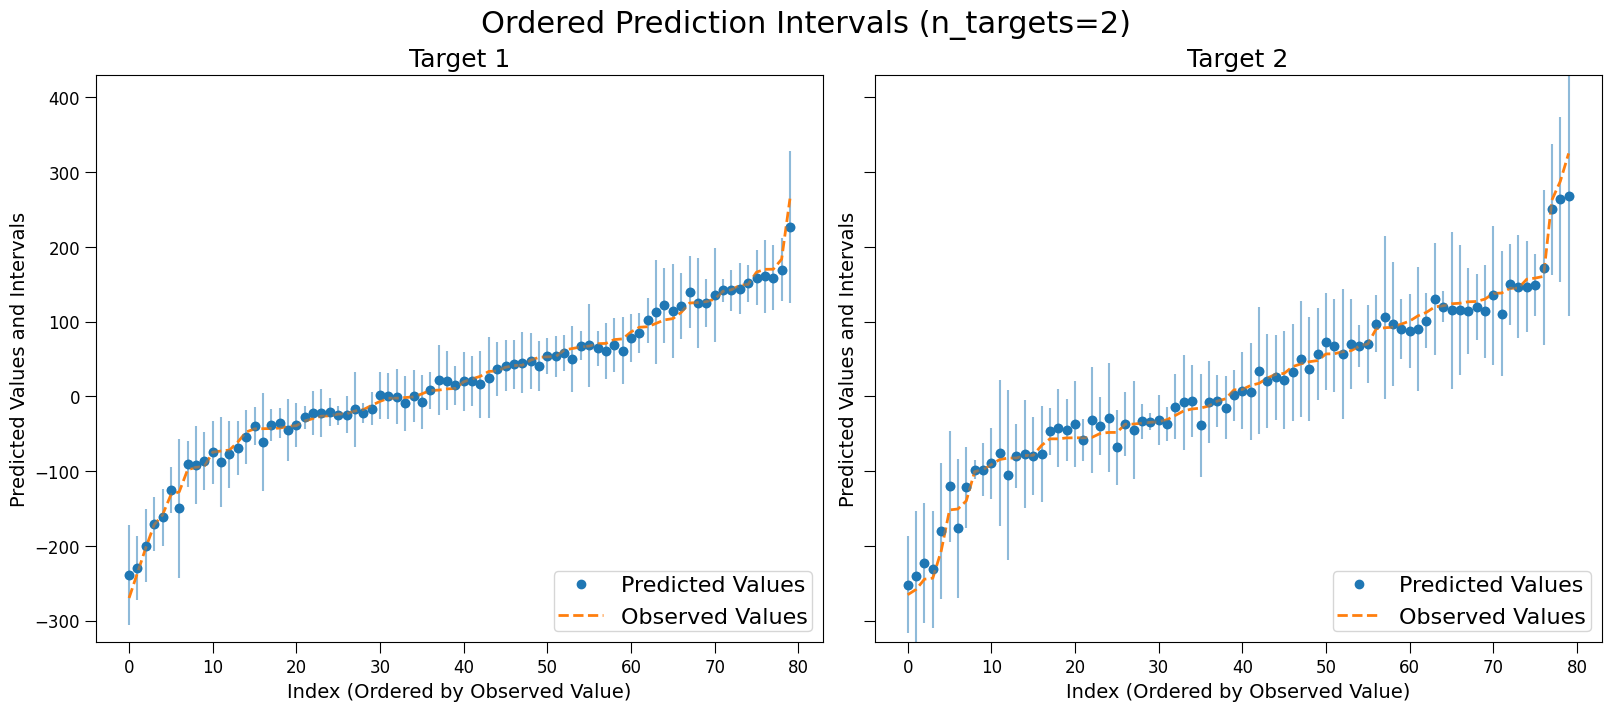

In [14]:
# Improved output for n_targets=2 with larger subplot size and proper spacing

import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

def plot_intervals_ordered(y_pred, y_std, y_true, n_subset=None, ylims=None, num_stds_confidence_bound=2, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 6))
    if n_subset is not None:
        idx = np.random.choice(len(y_pred), n_subset, replace=False)
        idx = np.sort(idx)
        y_pred, y_std, y_true = y_pred[idx], y_std[idx], y_true[idx]
    order = np.argsort(y_true.flatten())
    y_pred, y_std, y_true = y_pred[order], y_std[order], y_true[order]
    xs = np.arange(len(order))
    intervals = num_stds_confidence_bound * y_std
    ax.errorbar(xs, y_pred, intervals, fmt="o", ls="none", linewidth=1.5, c="#1f77b4", alpha=0.5)
    h1 = ax.plot(xs, y_pred, "o", c="#1f77b4")
    h2 = ax.plot(xs, y_true, "--", linewidth=2.0, c="#ff7f0e")
    ax.legend([h1[0], h2[0]], ["Predicted Values", "Observed Values"], loc=4)
    if ylims is not None:
        ax.set_ylim(ylims)
    ax.set_xlabel("Index (Ordered by Observed Value)", fontsize=14)
    ax.set_ylabel("Predicted Values and Intervals", fontsize=14)
    ax.set_title("Ordered Prediction Intervals", fontsize=18)
    ax.tick_params(labelsize=12)
    return ax

def plot_intervals_ordered_multi(y_pred, y_std, y_true, n_subset=None, num_stds_confidence_bound=2, suptitle="Ordered Prediction Intervals", max_cols=3, base_width=8, base_height=7):
    y_pred = np.atleast_2d(y_pred)
    y_std = np.atleast_2d(y_std)
    y_true = np.atleast_2d(y_true)
    if y_pred.shape[0] == 1 or y_pred.shape[0] != y_true.shape[0]:
        y_pred = y_pred.T
        y_std = y_std.T
        y_true = y_true.T
    n_targets = y_pred.shape[1]
    n_cols = min(n_targets, max_cols)
    n_rows = ceil(n_targets / n_cols)
    intervals = num_stds_confidence_bound * y_std
    ylims = (np.floor(np.min(y_pred - intervals)), np.ceil(np.max(y_pred + intervals)))
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(base_width * n_cols, base_height * n_rows),
        sharey=True,
        constrained_layout=True
    )
    axes = np.array(axes).reshape(n_rows, n_cols)
    axes_flat = axes.flatten()
    for i in range(n_targets):
        plot_intervals_ordered(
            y_pred[:, i], y_std[:, i], y_true[:, i],
            n_subset=n_subset, ylims=ylims,
            num_stds_confidence_bound=num_stds_confidence_bound,
            ax=axes_flat[i]
        )
        axes_flat[i].set_title(f"Target {i+1}", fontsize=18)
        axes_flat[i].set_xlabel("Index (Ordered by Observed Value)", fontsize=14)
        axes_flat[i].set_ylabel("Predicted Values and Intervals", fontsize=14)
        axes_flat[i].tick_params(labelsize=12)
    for j in range(n_targets, n_rows * n_cols):
        axes_flat[j].axis('off')
    fig.suptitle(suptitle + f" (n_targets={n_targets})", fontsize=22)
    return axes_flat[:n_targets]

# --- n_targets=2 example ---
n_targets = 2
X, y = make_regression(n_samples=80, n_features=4, n_targets=n_targets, noise=8, random_state=0)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=30, random_state=42)).fit(X, y)
y_pred = model.predict(X)
y_std = np.zeros_like(y_pred)
for i, est in enumerate(model.estimators_):
    all_preds = np.stack([tree.predict(X) for tree in est.estimators_], axis=1)
    y_std[:, i] = all_preds.std(axis=1)
plot_intervals_ordered_multi(
    y_pred, y_std, y,
    suptitle="Ordered Prediction Intervals",
    max_cols=3,
    base_width=8,  # much larger subplots
    base_height=7
)
plt.show()



/var/folders/dc/jns0jjpd3jvgnd361kh81lhc0000gn/T/ipykernel_81733/3784133077.py:93: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.13)


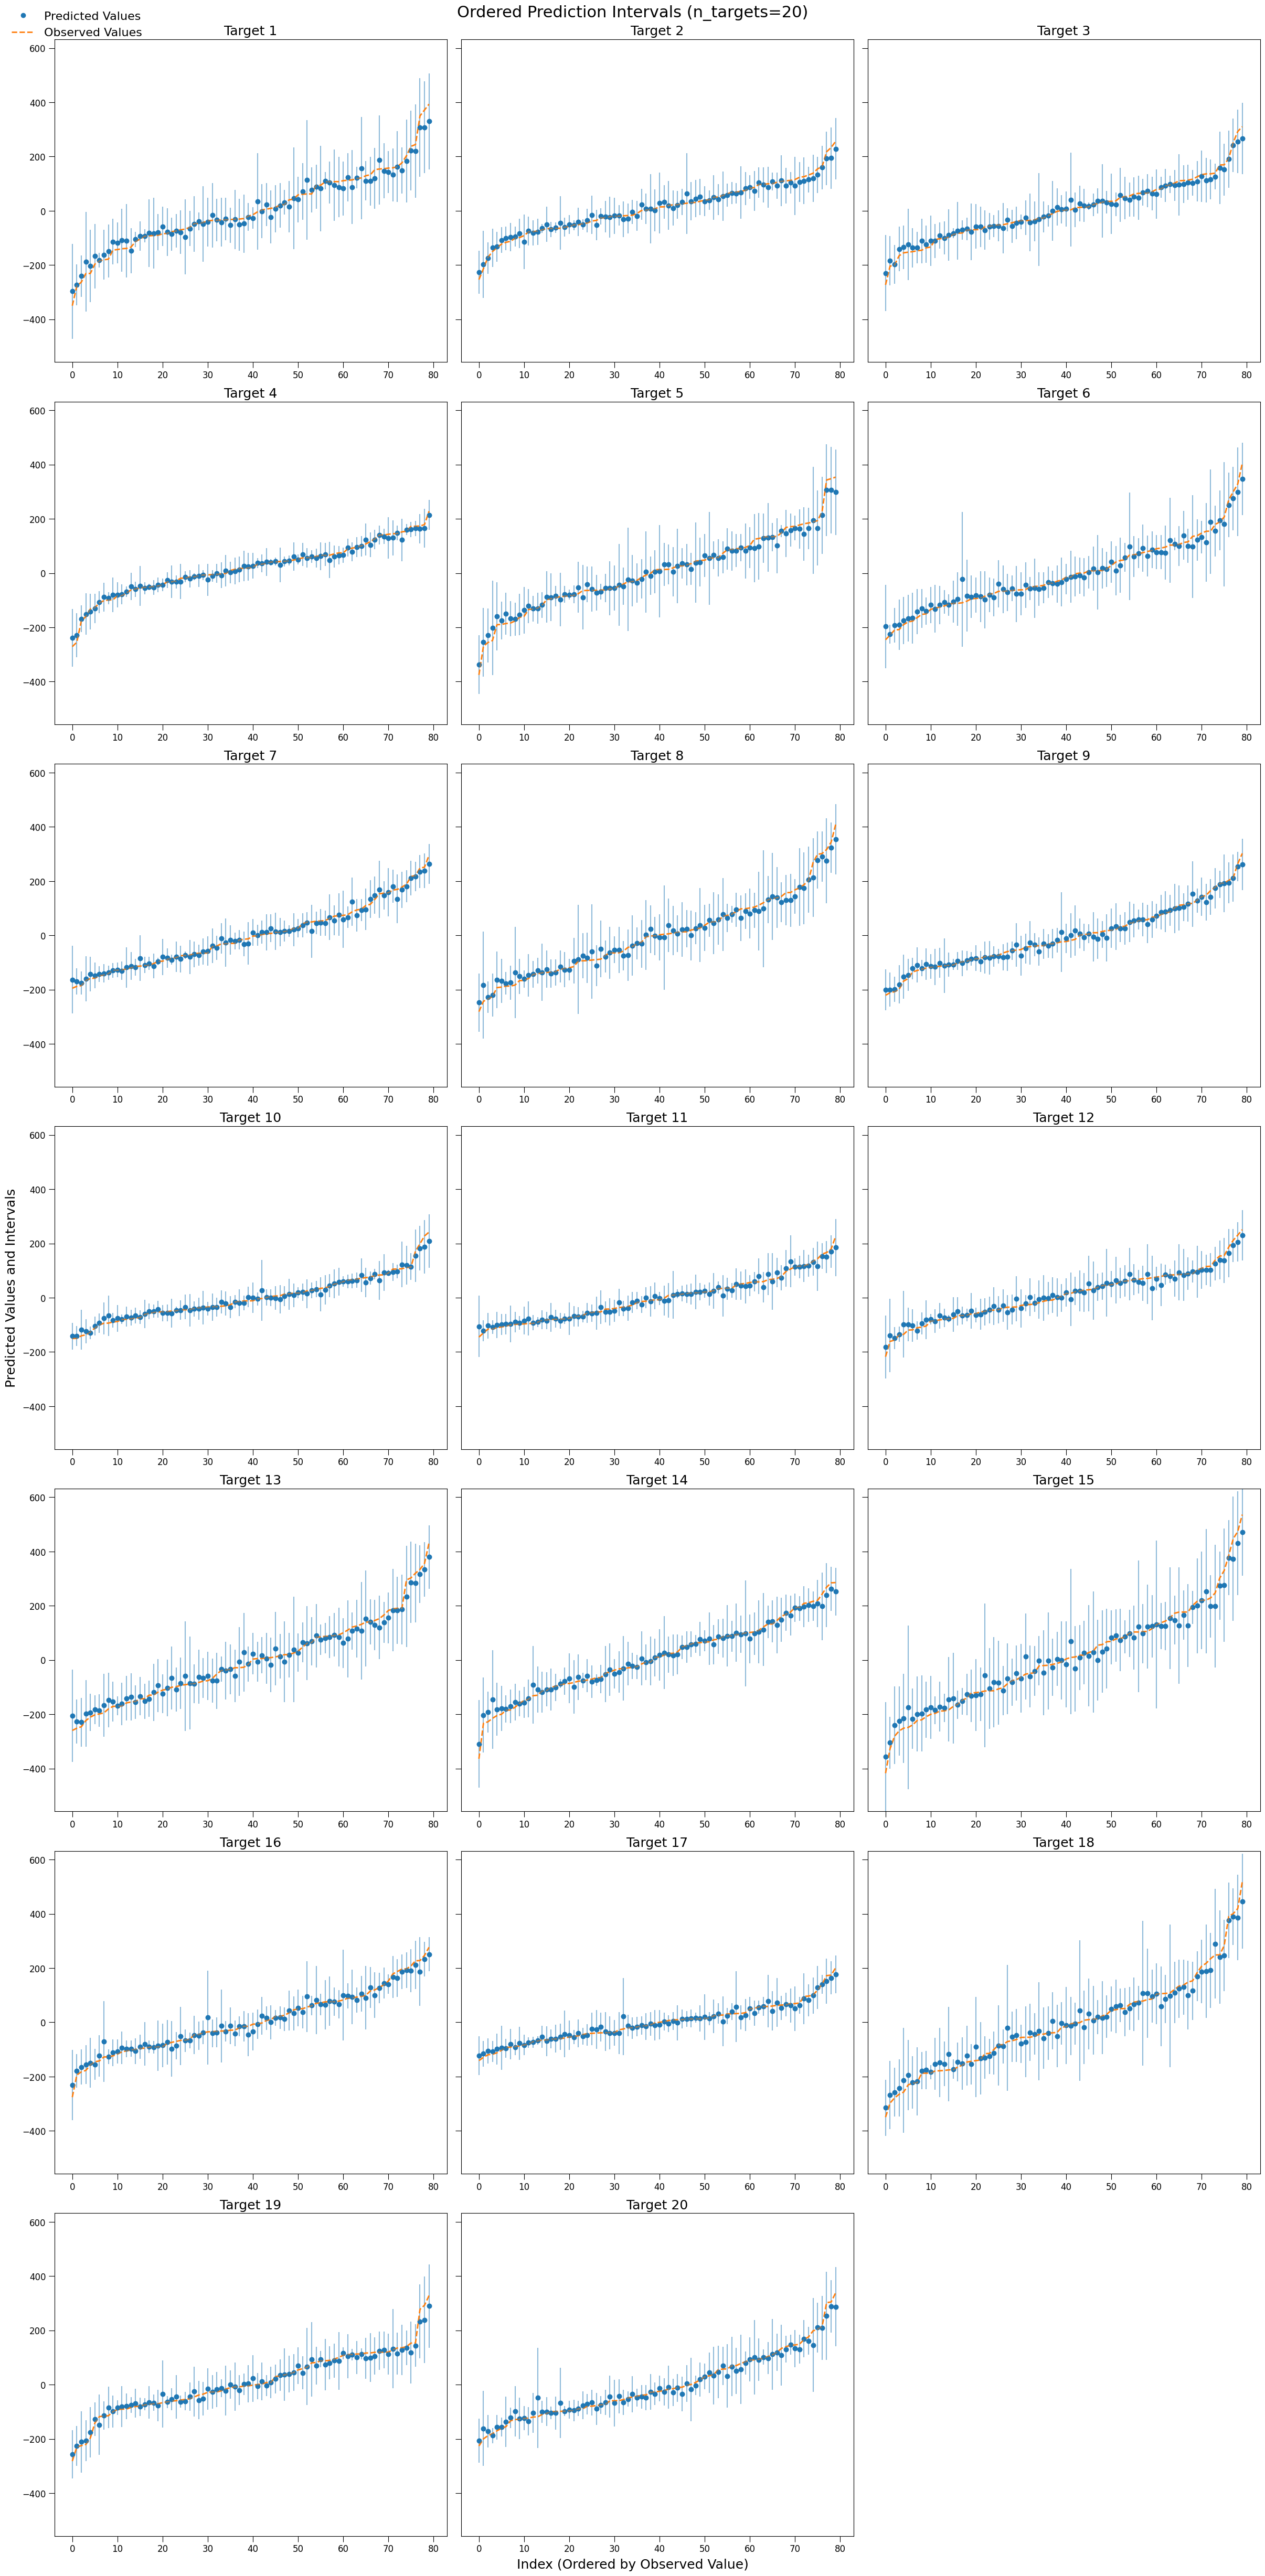

In [15]:
# Show n_targets=2 with shared x/y labels and shared legend

import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

def plot_intervals_ordered(y_pred, y_std, y_true, n_subset=None, ylims=None, num_stds_confidence_bound=2, ax=None, add_legend=True):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 6))
    if n_subset is not None:
        idx = np.random.choice(len(y_pred), n_subset, replace=False)
        idx = np.sort(idx)
        y_pred, y_std, y_true = y_pred[idx], y_std[idx], y_true[idx]
    order = np.argsort(y_true.flatten())
    y_pred, y_std, y_true = y_pred[order], y_std[order], y_true[order]
    xs = np.arange(len(order))
    intervals = num_stds_confidence_bound * y_std
    pred_points = ax.errorbar(xs, y_pred, intervals, fmt="o", ls="none", linewidth=1.5, c="#1f77b4", alpha=0.5, label="Predicted Values")
    pred_line, = ax.plot(xs, y_pred, "o", c="#1f77b4", label=None)
    obs_line, = ax.plot(xs, y_true, "--", linewidth=2.0, c="#ff7f0e", label="Observed Values")
    if add_legend:
        ax.legend([pred_line, obs_line], ["Predicted Values", "Observed Values"], loc=4)
    if ylims is not None:
        ax.set_ylim(ylims)
    # Remove per-axis labels for shared labels
    # ax.set_xlabel("Index (Ordered by Observed Value)", fontsize=14)
    # ax.set_ylabel("Predicted Values and Intervals", fontsize=14)
    ax.set_title("Ordered Prediction Intervals", fontsize=18)
    ax.tick_params(labelsize=12)
    return pred_line, obs_line, ax

def plot_intervals_ordered_multi(
    y_pred, y_std, y_true, n_subset=None, num_stds_confidence_bound=2,
    suptitle="Ordered Prediction Intervals", max_cols=3, base_width=8, base_height=7
):
    y_pred = np.atleast_2d(y_pred)
    y_std = np.atleast_2d(y_std)
    y_true = np.atleast_2d(y_true)
    if y_pred.shape[0] == 1 or y_pred.shape[0] != y_true.shape[0]:
        y_pred = y_pred.T
        y_std = y_std.T
        y_true = y_true.T
    n_targets = y_pred.shape[1]
    n_cols = min(n_targets, max_cols)
    n_rows = ceil(n_targets / n_cols)
    intervals = num_stds_confidence_bound * y_std
    ylims = (np.floor(np.min(y_pred - intervals)), np.ceil(np.max(y_pred + intervals)))
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(base_width * n_cols, base_height * n_rows),
        sharey=True,
        constrained_layout=True
    )
    axes = np.array(axes).reshape(n_rows, n_cols)
    axes_flat = axes.flatten()
    handles = None
    for i in range(n_targets):
        pred_line, obs_line, ax = plot_intervals_ordered(
            y_pred[:, i], y_std[:, i], y_true[:, i],
            n_subset=n_subset, ylims=ylims,
            num_stds_confidence_bound=num_stds_confidence_bound,
            ax=axes_flat[i], add_legend=False
        )
        if handles is None:
            handles = [pred_line, obs_line]
        axes_flat[i].set_title(f"Target {i+1}", fontsize=18)
        axes_flat[i].tick_params(labelsize=12)
    for j in range(n_targets, n_rows * n_cols):
        axes_flat[j].axis('off')
    # # Shared legend at the bottom
    # fig.legend(
    #     handles,
    #     ["Predicted Values", "Observed Values"],
    #     loc='lower center',
    #     ncol=2,
    #     fontsize=16,
    #     frameon=False,
    #     bbox_to_anchor=(0.5, 0.01)
    # )
    fig.legend(
        handles, ["Predicted Values", "Observed Values"],
        loc='upper left',
        bbox_to_anchor=(0.0001, 0.9999),
        fontsize=16,
        frameon=False
    )
    fig.supxlabel("Index (Ordered by Observed Value)", fontsize=18)
    fig.supylabel("Predicted Values and Intervals", fontsize=18)
    fig.suptitle(suptitle + f" (n_targets={n_targets})", fontsize=22)
    plt.subplots_adjust(bottom=0.13)
    return axes_flat[:n_targets]

# --- n_targets=2 example ---
n_targets = 20
X, y = make_regression(n_samples=80, n_features=4, n_targets=n_targets, noise=8, random_state=0)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=30, random_state=42)).fit(X, y)
y_pred = model.predict(X)
y_std = np.zeros_like(y_pred)
for i, est in enumerate(model.estimators_):
    all_preds = np.stack([tree.predict(X) for tree in est.estimators_], axis=1)
    y_std[:, i] = all_preds.std(axis=1)
plot_intervals_ordered_multi(
    y_pred, y_std, y,
    suptitle="Ordered Prediction Intervals",
    max_cols=3,
    base_width=8,
    base_height=7
)
plt.show()



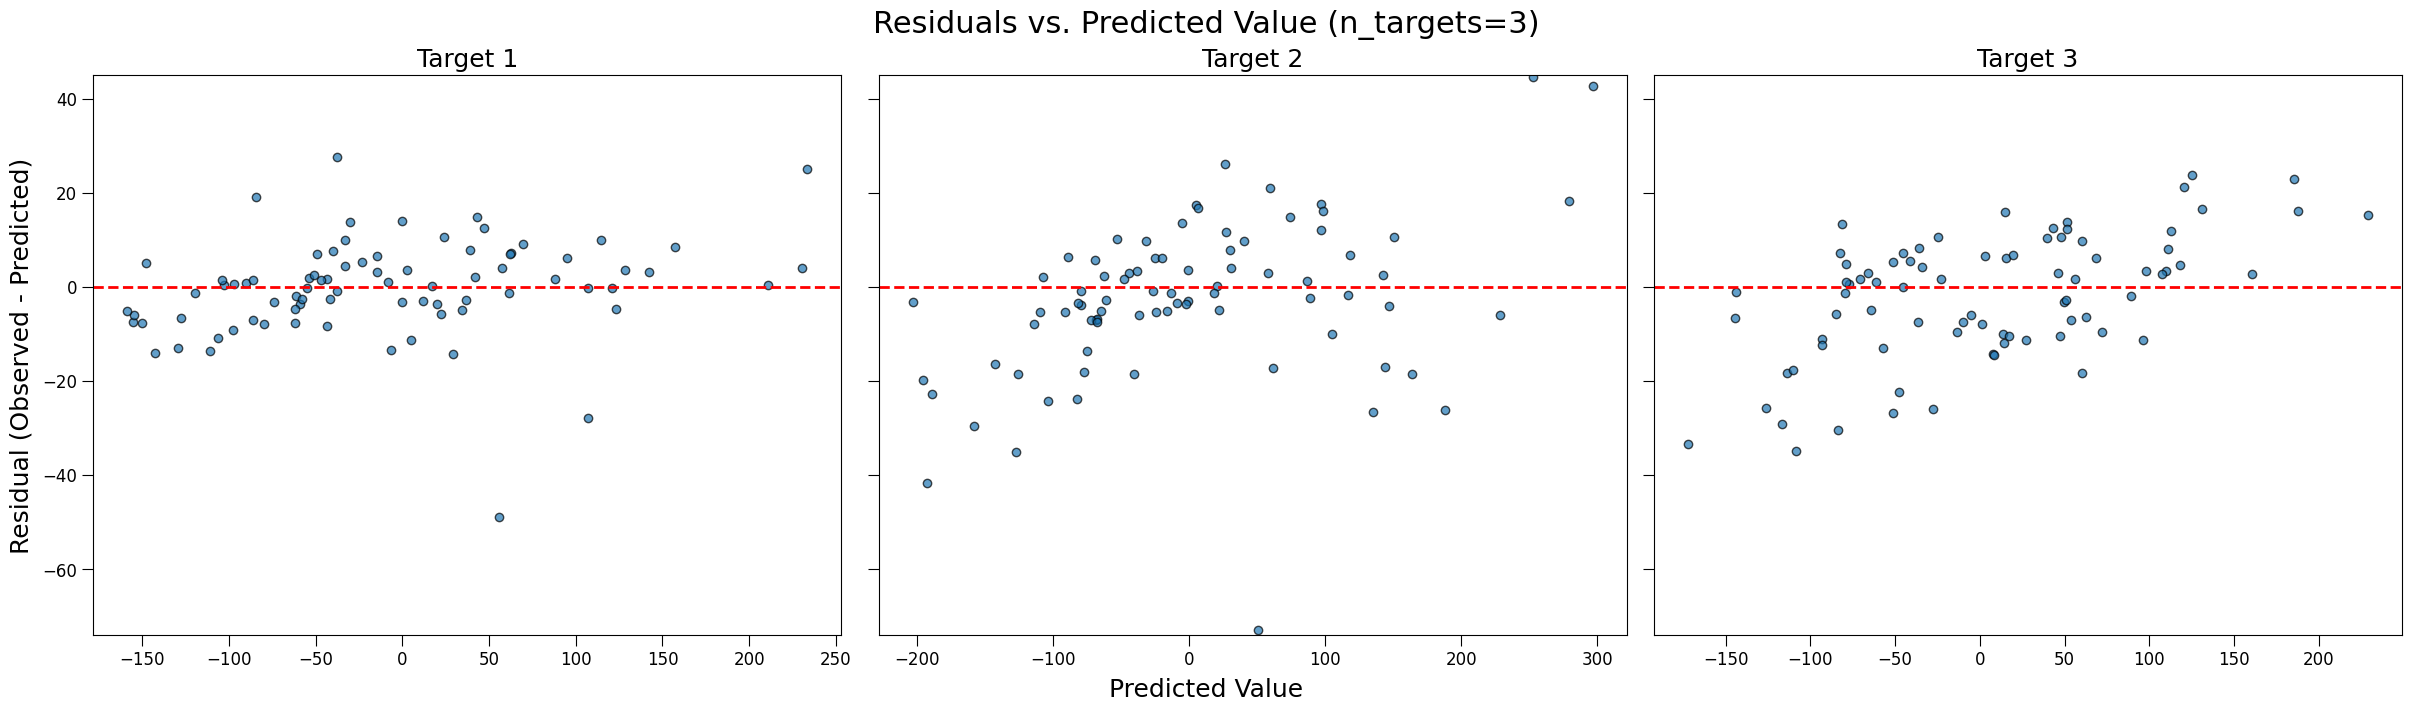

array([<Axes: title={'center': 'Target 1'}>,
       <Axes: title={'center': 'Target 2'}>,
       <Axes: title={'center': 'Target 3'}>], dtype=object)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def plot_residuals_multioutput(
    y_pred, y_true, max_cols=3, base_width=8, base_height=7, suptitle="Residuals vs. Predicted Value"
):
    """
    Plots residuals (y_true - y_pred) for each output dimension in a grid.
    All subplots share y-limits (residual range) for comparison.
    """
    y_pred = np.atleast_2d(y_pred)
    y_true = np.atleast_2d(y_true)
    if y_pred.shape[0] == 1 or y_pred.shape[0] != y_true.shape[0]:
        y_pred = y_pred.T
        y_true = y_true.T
    n_targets = y_pred.shape[1]
    n_cols = min(n_targets, max_cols)
    n_rows = ceil(n_targets / n_cols)
    residuals = y_true - y_pred
    # Shared y-axis for all
    rmin = np.floor(np.min(residuals))
    rmax = np.ceil(np.max(residuals))
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(base_width * n_cols, base_height * n_rows),
        sharey=True,
        constrained_layout=True
    )
    axes = np.array(axes).reshape(n_rows, n_cols)
    axes_flat = axes.flatten()
    for i in range(n_targets):
        ax = axes_flat[i]
        ax.scatter(y_pred[:, i], residuals[:, i], alpha=0.7, color="#1f77b4", edgecolor="k")
        ax.axhline(0, color="red", linestyle="--", lw=2)
        ax.set_ylim([rmin, rmax])
        ax.set_title(f"Target {i+1}", fontsize=18)
        ax.tick_params(labelsize=12)
    # Hide unused axes
    for j in range(n_targets, n_rows * n_cols):
        axes_flat[j].axis('off')
    # Shared labels
    fig.supxlabel("Predicted Value", fontsize=18)
    fig.supylabel("Residual (Observed - Predicted)", fontsize=18)
    fig.suptitle(suptitle + f" (n_targets={n_targets})", fontsize=22)
    plt.show()
    return axes_flat[:n_targets]
# Example: n_targets = 3
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

n_targets = 3
X, y = make_regression(n_samples=80, n_features=4, n_targets=n_targets, noise=8, random_state=0)
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=30, random_state=42)).fit(X, y)
y_pred = model.predict(X)
plot_residuals_multioutput(y_pred, y)
